# tmp

In [3]:
#TODO MAD CW_SSIM NLPD VSI FSIM
#from piq import IS, FID, GS, KID, MSID, PR
from piq import HaarPSILoss,VIFLoss, DSSLoss,dss, multi_scale_ssim, multi_scale_gmsd,vif, vif_p,MDSILoss, GMSDLoss,VSILoss,SRSIMLoss
from IQA_pytorch import GMSD, VIF, VIFs, MS_SSIM, SSIM
from piq import DISTS as piq_DISTS
from piq import LPIPS as piq_LPIPS
to_train = True

self.GMSD_loss_1 = GMSD()
self.iqa_vifs_loss = VIFs()    
self.iqa_vif_loss = VIF()
self.piq_vif_Loss = VIFLoss()
self.piq_vif_p_loss = vif_p
self.dss_loss_1 = DSSLoss()
self.dss_loss_2 = dss
self.msssim_1_loss = multi_scale_ssim
self.haarpsi_loss = HaarPSILoss()
self.msssim_2 = MS_SSIM()
self.ms_gmsd_loss = multi_scale_gmsd
self.SRSIM_loss = SRSIMLoss()
self.VSI_loss = VSILoss()
self.GMSD_loss_2 = GMSDLoss()
self.MDSI_met = MDSILoss()
self.ssim_loss = SSIM()
self.DISTS_loss_2 = piq_DISTS()
self.LPIPS_loss_2 = piq_LPIPS()


In [8]:
X_sample = X_sample.requires_grad_().to(device)
lst_direction = []
met_lst = ["PieAPP","SSIM", "DISTS","LPIPS", "GMSD","GMSD1","VIFs","VIF","VIFLoss","VIFp","DSS","DSS1","MS-SSIM","HaarPSI","MS-SSIM","MS-GMSD","SRSIM","VSI","MDSI","DISTS1","LPIPS1"]
for tar_met in met_lst:
    cfg["run"]["loss_calc"] = Custom_enh_Loss(target_lst = [tar_met])
    cfg["run"]["loss_calc"].eval()
    cfg["run"]["loss_calc"] = cfg["run"]["loss_calc"].requires_grad_(True).to(device)
    
    ls = cfg["run"]["loss_calc"]({"x_hat" :X_sample}, X_sample)
    ls1 = list(ls.items())[2][1]
    
    ls = cfg["run"]["loss_calc"]({"x_hat" :X_sample - X_sample}, X_sample)
    ls2 = list(ls.items())[2][1]
    lst_direction.append(ls1.item() > ls2.item())
    print(list(zip(met_lst, lst_direction)))
    print(ls1.item() == ls2.item())

[('PieAPP', False)]
False
[('PieAPP', False), ('SSIM', False)]
False
[('PieAPP', False), ('SSIM', False), ('DISTS', False)]
False
[('PieAPP', False), ('SSIM', False), ('DISTS', False), ('LPIPS', False)]
False
[('PieAPP', False), ('SSIM', False), ('DISTS', False), ('LPIPS', False), ('GMSD', False)]
False
[('PieAPP', False), ('SSIM', False), ('DISTS', False), ('LPIPS', False), ('GMSD', False), ('GMSD1', False)]
False
[('PieAPP', False), ('SSIM', False), ('DISTS', False), ('LPIPS', False), ('GMSD', False), ('GMSD1', False), ('VIFs', False)]
False
[('PieAPP', False), ('SSIM', False), ('DISTS', False), ('LPIPS', False), ('GMSD', False), ('GMSD1', False), ('VIFs', False), ('VIF', False)]
False
[('PieAPP', False), ('SSIM', False), ('DISTS', False), ('LPIPS', False), ('GMSD', False), ('GMSD1', False), ('VIFs', False), ('VIF', False), ('VIFLoss', False)]
False
[('PieAPP', False), ('SSIM', False), ('DISTS', False), ('LPIPS', False), ('GMSD', False), ('GMSD1', False), ('VIFs', False), ('VIF', Fal

In [30]:
device = "cuda:0"
X_sample = X_sample.to(device).requires_grad_()

loss = LPIPS()
loss = loss.requires_grad_(True)
loss.requires_grad = True
loss.eval()
X_sample = X_sample.to(device)
loss = loss.to(device)
#with torch.enable_grad():
ls = loss(X_sample, X_sample)
ls

C:\ProgramData\Anaconda3\envs\backup\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


tensor(0., device='cuda:0', grad_fn=<MeanBackward1>)

In [23]:
torch.rfft = torch.fft.rfft
cfg["run"]["loss_calc"] = Custom_enh_Loss(target_lst = ["LPIPS"])#PieAPP DISTS LPIPS
X_sample = X_sample.to(device)
cfg["run"]["loss_calc"]({"x_hat" : X_sample}, X_sample)

{'mse_loss': tensor(0., device='cuda:0'),
 'PSNR': tensor(inf, device='cuda:0'),
 'LPIPS': tensor(0., device='cuda:0'),
 'loss': tensor(0., device='cuda:0')}

In [20]:
codec_compressor = codec_outer_compress("R:/home_dir/", " -c:v mjpeg -q:v 1 ")
codec_compressor()
print(codec_compressor.get_bitrate())
#logs_plot_cur['bitrate'] = codec_compressor.get_bitrate()
#logs_plot_cur

102.283965


In [9]:
codec_compressor.get_bitrate()

102.366671

In [ ]:
"model_vimeo11k_DISTS1_cheng2020_attn_quality2_FRtuning.ckpt"
"model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning - Copy.ckpt"
"model_vimeo11k_LPIPS1_cheng2020_attn_quality2_FRtuning_сщзн.ckpt"

In [3]:
get_met_names(directory='./models_enhancement_FR/',key= lambda x: "model_vimeo11k_DISTS1_cheng2020_attn_quality2_FRtuning.ckpt" in x or "model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning - Copy.ckpt" in x or "model_vimeo11k_LPIPS1_cheng2020_attn_quality2_FRtuning_сщзн.ckpt" in x, force_names= [['./models_enhancement_FR/model_vimeo11k_DISTS1_cheng2020_attn_quality2_FRtuning.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS1_cheng2020_attn_quality2_FRtuning_сщзн.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning - Copy.ckpt'], ["DISTS1", "LPIPS1", "LPIPS"], ['./models_enhancement_FR/model_vimeo11k_DISTS1_cheng2020_attn_quality2_FRtuning.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS1_cheng2020_attn_quality2_FRtuning_сщзн.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning - Copy.ckpt']])[0]

[['./models_enhancement_FR/model_vimeo11k_DISTS1_cheng2020_attn_quality2_FRtuning.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS1_cheng2020_attn_quality2_FRtuning_сщзн.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning - Copy.ckpt'],
 ['DISTS1', 'LPIPS1', 'LPIPS'],
 ['./models_enhancement_FR/model_vimeo11k_DISTS1_cheng2020_attn_quality2_FRtuning.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS1_cheng2020_attn_quality2_FRtuning_сщзн.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning - Copy.ckpt']]

In [ ]:
 #a0= model_dirs_full, model_dirs_full, model_names = get_met_names(key= lambda x: "2000mse" in x and 
        #                                                                     "cheng2020_attn_quality2" in x and 
        #                                                                     'quality5' not in x and (('fixed_direction' in x) or 
        #                                                                                              "MDTVSFA_2000m" in x))
        
        #a0 = [a0[0][1:], a0[1][1:], a0[2][1:]]
        #a1 = get_met_names(key= lambda x: "model_vimeo11k_Linearity_2000mse_enhance_no_codec_fixed_direction.ckpt" in x)
        #a2 = get_met_names(directory='./models_enhancement/0403/', key= lambda x: "" in x)
        #model_dirs_full, model_target_met_names, model_names = [a0[0] + a1[0] + a2[0], a0[1] + a1[1] + a2[1],a0[2] +  a1[2] + a2[2]]
        #model_dirs_full, model_target_met_names, model_names = model_dirs_full, model_target_met_names, model_names

In [ ]:
"""force_names= [['./models_enhancement_FR/model_vimeo11k_DISTS1_cheng2020_attn_quality2_FRtuning.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS1_cheng2020_attn_quality2_FRtuning_сщзн.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning - Copy.ckpt'], ["DISTS1", "LPIPS1", "LPIPS"], ['./models_enhancement_FR/model_vimeo11k_DISTS1_cheng2020_attn_quality2_FRtuning.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS1_cheng2020_attn_quality2_FRtuning_сщзн.ckpt',
  './models_enhancement_FR/model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning - Copy.ckpt']]"""

# part 2

In [1]:
import yaml
from types import SimpleNamespace
cfg_dir = "tmp.yaml"
with open(cfg_dir) as fh:
    cfg = yaml.load(fh, Loader=yaml.FullLoader)
    cfg["general"]["cfg_dir"] = cfg_dir

cfg["general"]["break_flag"] = True
home_dir = "R:/home_dir/"
dst_dir = "P:/7videos/"
#exec(open('Current_model.py').read())
%run -i Current_model_lib
#%run -i Train_current_model
home_dir = "R:/home_dir/"
dst_dir = "P:/7videos/"

%run -i Codecs_validation
import wandb


In [2]:
logs_dir = "E:/VMAF_METRIX/NeuralNetworkCompression/logs/"
runs_names = ["DISTS_q3_256_smallnetskips_14_04",
"LPIPS1_q3_256_smallnetskips_14_04",
"LPIPS1_q3_256_Resnet18Unet_14_04",
"DISTS_q3_256_Resnet18Unet_14_04"]

"""for run_name in runs_names:
    with open(os.path.join(logs_dir,run_name, "best_model.txt")) as f:
        line = f.readlines()[0]
        model_dir = os.path.join(logs_dir,run_name, line)
        model = torch.load(model_dir)['model']
        with open(os.path.join(logs_dir,run_name,"cfg.yaml")) as fh:
            cfg = yaml.load(fh, Loader=yaml.Loader)   
        cfg['general']['met_names'][0]"""
run_full_names = [os.path.join(logs_dir,run_name) for run_name in runs_names]

In [3]:

def load_model_from_run(path):
    with open(os.path.join(path, "best_model.txt")) as f:
        line = f.readlines()[0]
    model_dir = os.path.join(path, line)
    model = torch.load(model_dir)['model']
    return model

def load_met_name(path):
    with open(os.path.join(path,"cfg.yaml")) as fh:
        cfg = yaml.load(fh, Loader=yaml.Loader)   
    return cfg['general']['met_names'][0]

def get_models_from_runs(model_dirs):
    return [load_model_from_run(i) for i in model_dirs] 

def load_met_names(paths):
    a = [load_met_name(path) for path in paths]
    return [a, a, a]

def load_model1(keys):
    import os
    a = None
    v1 = None
    try:
        v = smallnet_skips()
        a = v.load_state_dict(keys)
        v1 = v
    except Exception:
        pass
    try:
        v = ResNetUNet(3)
        a = v.load_state_dict(keys)
        v1 = v
    except Exception:
        pass
    return v1
        

In [4]:
from compressai.zoo import cheng2020_attn
codecs_all_neural = [1,3,4,6]
#codecs_all_neural_run = [cheng2020_attn(quality=q, pretrained=True,device = cfg["run"]["device_sub"]) for q in codecs_all_neural]
codecs_all_motion = [" -c:v mjpeg -q:v 1 "," -c:v mjpeg -q:v 2 ", " -c:v mjpeg -q:v 3 ", " -c:v mjpeg -q:v 5 ", " -c:v mjpeg -q:v 7 ", " -c:v mjpeg -q:v 9 "]
codecs_all_test = [" -vcodec libx264   -preset:v medium -b:v 100k ",
                   " -vcodec libx264   -preset:v medium -b:v 3M "]
codecs_all_h264 = [" -vcodec libx264   -preset:v medium -b:v 100k ",
                   " -vcodec libx264   -preset:v medium -b:v 200k ",
                   " -vcodec libx264   -preset:v medium -b:v 300k ",
                   " -vcodec libx264   -preset:v medium -b:v 500k ",
                   " -vcodec libx264   -preset:v medium -b:v 1M ",
                   " -vcodec libx264   -preset:v medium -b:v 2M ",
                   " -vcodec libx264   -preset:v medium -b:v 3M ",
                   " -vcodec libx264   -preset:v medium -b:v 5M ",
                   " -vcodec libx264   -preset:v medium -b:v 7M "
                   " -vcodec libx264   -preset:v medium -b:v 9M ",
                   " -vcodec libx264   -preset:v medium -b:v 12M "]
codecs_all_neural_2 = [3, 6]
#codecs_all_neural_2_run = [cheng2020_attn(quality=q, pretrained=True,device = cfg["run"]["device_sub"]) for q in codecs_all_neural_2]
codecs_all_motion_1 = [" -c:v mjpeg -q:v 3 "]
codecs_all_h264_3 = [ " -vcodec libx264   -preset:v medium -b:v 3M ",]
force_names = ["model_vimeo11k_DISTS_cheng2020_attn_quality2_FRtuning.ckpt","model_vimeo11k_LPIPS_cheng2020_attn_quality2_FRtuning.ckpt",
"model_vimeo11k_LPIPS1_no_codec_FRtuning.ckpt"]
force_names = ['./models_enhancement_FR/' + i for i in force_names], ["DISTS", "LPIPS", "LPIPS1"], force_names

force_names= []

In [5]:
#FR#new
cfg["run"]["logger"] = Logger(cfg)

#codecs_all_motion, codecs_all_h264 
for codecs_all, codec_type in zip([codecs_all_neural, codecs_all_motion, codecs_all_h264], ["neural", "motion", "h264"]):
    for to_crop in [True, False]:
        for Identity_flag in [False, True]:
            try:
                Log_1 = []
                if not "logs" in cfg:
                    cfg["logs"] = {}
                try:
                    os.mkdir(cfg['general']['home_dir'])
                except Exception:
                    pass
                cfg["general"]["to_crop"] = to_crop
                cfg["general"]["codecs"] = codecs_all
                cfg["general"]["codec_type"] = codec_type
                cfg["general"]['enhance'] = Identity_flag
                if type(cfg["general"]["codecs"][0]) == int:
                    cfg["run"]["codecs"] = [cheng2020_attn(quality=q, pretrained=True,device = cfg["run"]["device_sub"]).eval() for q in codecs_all_neural]
                else:
                    cfg["run"]["codecs"] = cfg["general"]["codecs"]
                
                cfg["general"]["name"] = "newpipeline" + ("crop" if to_crop else "FullHD") + codec_type + ("_Identity" if Identity_flag else "")
                model_dirs_full, model_target_met_names, model_names = load_met_names(run_full_names)
                net_enhances = [load_model1(i) for i in get_models_from_runs(run_full_names)]
                #model_target_met_names = [i if i != "PAC2PIC" else "PAC2PIQ" for i in model_target_met_names]
                if Identity_flag:
                    model_target_met_names = np.unique(model_target_met_names)
                wandb.init(project="Whitebox_strong_metrics_attacks", entity="havent_invented", name="RD_curves_all_met_10_04" + ("Without Preprocessing" if Identity_flag else "With Preprocessing"),
                           tags = {"RD curves", ("Without Preprocessing" if Identity_flag else "With Preprocessing")}, save_code = True)  
                wandb.config.update({'general' : cfg['general']})
                cfg['general']['model_names'] = model_target_met_names
                cfg["run"]["logger"] = Logger(cfg)
                cfg["run"]["logger"].write_cfg()
                for idxf, file in tqdm(enumerate(os.listdir(dst_dir))):
                    if idxf != 0:
                        continue 
                    Log_2 = []
                    for model,met_name,fil_name_1 in tqdm(zip(net_enhances, model_target_met_names, model_dirs_full)):
                        if met_name == "VSFA":
                            batch_sz = 2
                        else:
                            batch_sz = 1#2
                        if met_name == "Linearity":
                            deivce_main = "cuda:0"
                        else:
                            deivce_main = "cuda:0"
                        torch.cuda.empty_cache()
                        with torch.no_grad():
                            try:
                                f_name = met_name + " " +  file + (" without" if Identity_flag else " with") + " preprocessing" 
                                print(met_name, fil_name_1)
                                try:
                                    del cfg["run"]["loss_calc"]
                                except Exception:
                                    pass
                                cfg["run"]["loss_calc"] = Custom_enh_Loss(target_lst=[met_name], to_train = False, crop_NIMA = False)
                                cfg["run"]["loss_calc"] = cfg["run"]["loss_calc"].to('cpu')
                                ful_name = dst_dir + file
                                with torch.no_grad():
                                    Log_3 = models_codecs_dataset_outer([enhance_Identity if Identity_flag else model],cfg, codecs = cfg["run"]["codecs"],
                                                    vid_full_dir = ful_name)
                                table = wandb.Table(columns= list(Log_3[0].keys()), data = [list(Log_3[0].values())])
                                wandb.log({f_name: table}) 
                                print(Log_3)
                                Log_2.append(Log_3)
                            except Exception as exc:
                                raise
                                wandb.alert(title=str(exc), text=str(exc) + " in " + f_name, level = wandb.AlertLevel.ERROR)
                                print("Exception in " + met_name)
                        
                    Log_1.append(Log_2)
                    if 1:
                        cfg["logs"]["Log_1"] = Log_1
                        wandb.log(cfg["logs"])
                        #np.save("./Logs_rd_curves/DISTSLPIPSLPIPS1" + ("crop" if to_crop else "FullHD") + codec_type + ("_Identity" if Identity_flag else "") + ".npy", Log_1)
                        cfg["run"]["logger"].write_logs()
                wandb.finish()
                print(Log_1)
            except Exception as exc:
                raise
                wandb.alert(title=str(exc), text=str(exc) + " in " + f_name, level = wandb.AlertLevel.ERROR)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: metricshacking (use `wandb login --relogin` to force relogin)


0it [00:00, ?it/s]

0it [00:00, ?it/s]

DISTS DISTS


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0019530586, 0.0017760681, 0.0018367441, 0.0017948002], 'bpp_loss': [0.0702311, 0.16796252, 0.26166153, 0.5247161], 'loss_classic': [1.3402075, 1.3228508, 1.4560044, 1.6917849], 'PSNR': [27.123528, 27.524069, 27.372349, 27.475807], 'DISTS': [0.26634392, 0.21063113, 0.20389898, 0.15340646], 'loss': [0.26634392, 0.21063113, 0.20389898, 0.15340646]}]
LPIPS1 LPIPS1


0it [00:00, ?it/s]

C:\ProgramData\Anaconda3\envs\backup\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.004697996, 0.004492633, 0.004695886, 0.004627127], 'bpp_loss': [0.07054546, 0.17635417, 0.27272236, 0.5540665], 'loss_classic': [3.1254172, 3.0976887, 3.3262222, 3.5628557], 'PSNR': [23.28638, 23.477726, 23.28381, 23.348682], 'LPIPS1': [0.37260222, 0.2541415, 0.21786161, 0.13624364], 'loss': [0.37260222, 0.2541415, 0.21786161, 0.13624364]}]
LPIPS1 LPIPS1


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.002104463, 0.0021745686, 0.002180344, 0.0022424678], 'bpp_loss': [0.11079122, 0.2562849, 0.38973725, 0.7152175], 'loss_classic': [1.4792184, 1.6702981, 1.8075058, 2.1733818], 'PSNR': [26.804352, 26.663197, 26.64286, 26.517311], 'LPIPS1': [0.33283454, 0.25580198, 0.22959206, 0.18739802], 'loss': [0.33283454, 0.25580198, 0.22959206, 0.18739802]}]
DISTS DISTS


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.017452441, 0.017478129, 0.01757032, 0.017502408], 'bpp_loss': [0.10295494, 0.2452097, 0.36099386, 0.6651417], 'loss_classic': [11.451405, 11.610363, 11.786095, 12.046083], 'PSNR': [17.58562, 17.578804, 17.555794, 17.572598], 'DISTS': [0.3610353, 0.2897519, 0.26599753, 0.25474447], 'loss': [0.3610353, 0.2897519, 0.26599753, 0.25474447]}]



[[[{'mse': [0.0019530586, 0.0017760681, 0.0018367441, 0.0017948002], 'bpp_loss': [0.0702311, 0.16796252, 0.26166153, 0.5247161], 'loss_classic': [1.3402075, 1.3228508, 1.4560044, 1.6917849], 'PSNR': [27.123528, 27.524069, 27.372349, 27.475807], 'DISTS': [0.26634392, 0.21063113, 0.20389898, 0.15340646], 'loss': [0.26634392, 0.21063113, 0.20389898, 0.15340646]}], [{'mse': [0.004697996, 0.004492633, 0.004695886, 0.004627127], 'bpp_loss': [0.07054546, 0.17635417, 0.27272236, 0.5540665], 'loss_classic': [3.1254172, 3.0976887, 3.3262222, 3.5628557], 'PSNR': [23.28638, 23.477726, 23.28381, 23.348682], 'LPIPS1': [0.37260222, 0.2541415, 0.21786161, 0.13624364], 'loss': [0.37260222, 0.2541415, 0.21786161, 0.13624364]}], [{'mse': [0.002104463, 0.0021745686, 0.002180344, 0.0022424678], 'bpp_loss': [0.11079122, 0.2562849, 0.38973725, 0.7152175], 'loss_classic': [1.4792184, 1.6702981, 1.8075058, 2.1733818], 'PSNR': [26.804352, 26.663197, 26.64286, 26.517311], 'LPIPS1': [0.33283454, 0.25580198, 0.229

0it [00:00, ?it/s]

0it [00:00, ?it/s]

DISTS DISTS


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00065425714, 0.000335467, 0.0002366131, 0.000121265664], 'bpp_loss': [0.047203526, 0.113566846, 0.17298307, 0.343902], 'loss_classic': [0.47263426, 0.33170426, 0.3268407, 0.42275497], 'PSNR': [32.0158, 34.87426, 36.35063, 39.19345], 'DISTS': [0.29151464, 0.208372, 0.17526612, 0.11198944], 'loss': [0.29151464, 0.208372, 0.17526612, 0.11198944]}]
LPIPS1 LPIPS1


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00065425714, 0.000335467, 0.0002366131, 0.000121265664], 'bpp_loss': [0.047203526, 0.113566846, 0.17298307, 0.343902], 'loss_classic': [0.47263426, 0.33170426, 0.3268407, 0.42275497], 'PSNR': [32.0158, 34.87426, 36.35063, 39.19345], 'LPIPS1': [0.4190097, 0.29326278, 0.2342754, 0.14382258], 'loss': [0.4190097, 0.29326278, 0.2342754, 0.14382258]}]



[[[{'mse': [0.00065425714, 0.000335467, 0.0002366131, 0.000121265664], 'bpp_loss': [0.047203526, 0.113566846, 0.17298307, 0.343902], 'loss_classic': [0.47263426, 0.33170426, 0.3268407, 0.42275497], 'PSNR': [32.0158, 34.87426, 36.35063, 39.19345], 'DISTS': [0.29151464, 0.208372, 0.17526612, 0.11198944], 'loss': [0.29151464, 0.208372, 0.17526612, 0.11198944]}], [{'mse': [0.00065425714, 0.000335467, 0.0002366131, 0.000121265664], 'bpp_loss': [0.047203526, 0.113566846, 0.17298307, 0.343902], 'loss_classic': [0.47263426, 0.33170426, 0.3268407, 0.42275497], 'PSNR': [32.0158, 34.87426, 36.35063, 39.19345], 'LPIPS1': [0.4190097, 0.29326278, 0.2342754, 0.14382258], 'loss': [0.4190097, 0.29326278, 0.2342754, 0.14382258]}]]]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

DISTS DISTS


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0014856232, 0.0013906583, 0.0013603289, 0.0013441223], 'bpp_loss': [0.050565504, 0.105042845, 0.15825754, 0.31719857], 'loss_classic': [1.0165919, 1.0093185, 1.0428114, 1.1912141], 'PSNR': [28.28302, 28.569063, 28.664333, 28.716618], 'DISTS': [0.093559, 0.050820358, 0.04542839, 0.031787656], 'loss': [0.093559, 0.050820358, 0.04542839, 0.031787656]}]
LPIPS1 LPIPS1


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.003421216, 0.003352362, 0.0033652247, 0.003380836], 'bpp_loss': [0.055226166, 0.11324659, 0.17328061, 0.36241603], 'loss_classic': [2.279872, 2.29312, 2.361518, 2.5608044], 'PSNR': [24.65868, 24.74677, 24.73004, 24.709976], 'LPIPS1': [0.37355167, 0.31927046, 0.2953827, 0.24195811], 'loss': [0.37355167, 0.31927046, 0.2953827, 0.24195811]}]
LPIPS1 LPIPS1


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0019222181, 0.0019301815, 0.0018919893, 0.0019616862], 'bpp_loss': [0.07231948, 0.15849957, 0.24835959, 0.5407485], 'loss_classic': [1.3222418, 1.4136002, 1.4786257, 1.8163348], 'PSNR': [27.163307, 27.145071, 27.231468, 27.074255], 'LPIPS1': [0.36392212, 0.3382726, 0.31452382, 0.24086323], 'loss': [0.36392212, 0.3382726, 0.31452382, 0.24086323]}]
DISTS DISTS


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.004243602, 0.0042447206, 0.004190401, 0.004196458], 'bpp_loss': [0.06365438, 0.1440311, 0.22318019, 0.485977], 'loss_classic': [2.8230567, 2.9041605, 2.947989, 3.2147238], 'PSNR': [23.7291, 23.728165, 23.784359, 23.777935], 'DISTS': [0.13603243, 0.12079331, 0.12040083, 0.1293965], 'loss': [0.13603243, 0.12079331, 0.12040083, 0.1293965]}]



[[[{'mse': [0.0014856232, 0.0013906583, 0.0013603289, 0.0013441223], 'bpp_loss': [0.050565504, 0.105042845, 0.15825754, 0.31719857], 'loss_classic': [1.0165919, 1.0093185, 1.0428114, 1.1912141], 'PSNR': [28.28302, 28.569063, 28.664333, 28.716618], 'DISTS': [0.093559, 0.050820358, 0.04542839, 0.031787656], 'loss': [0.093559, 0.050820358, 0.04542839, 0.031787656]}], [{'mse': [0.003421216, 0.003352362, 0.0033652247, 0.003380836], 'bpp_loss': [0.055226166, 0.11324659, 0.17328061, 0.36241603], 'loss_classic': [2.279872, 2.29312, 2.361518, 2.5608044], 'PSNR': [24.65868, 24.74677, 24.73004, 24.709976], 'LPIPS1': [0.37355167, 0.31927046, 0.2953827, 0.24195811], 'loss': [0.37355167, 0.31927046, 0.2953827, 0.24195811]}], [{'mse': [0.0019222181, 0.0019301815, 0.0018919893, 0.0019616862], 'bpp_loss': [0.07231948, 0.15849957, 0.24835959, 0.5407485], 'loss_classic': [1.3222418, 1.4136002, 1.4786257, 1.8163348], 'PSNR': [27.163307, 27.145071, 27.231468, 27.074255], 'LPIPS1': [0.36392212, 0.3382726, 0

0it [00:00, ?it/s]

0it [00:00, ?it/s]

DISTS DISTS


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00045741035, 0.0002427882, 0.00018282993, 0.00010795996], 'bpp_loss': [0.040227734, 0.08058324, 0.11782837, 0.22368966], 'loss_classic': [0.33765882, 0.23845625, 0.23671353, 0.29389063], 'PSNR': [33.409172, 36.15796, 37.385662, 39.669075], 'DISTS': [0.09688894, 0.049075007, 0.040946618, 0.020031497], 'loss': [0.09688894, 0.049075007, 0.040946618, 0.020031497]}]
LPIPS1 LPIPS1


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00045741035, 0.0002427882, 0.00018282993, 0.00010795996], 'bpp_loss': [0.040227734, 0.08058324, 0.11782837, 0.22368966], 'loss_classic': [0.33765882, 0.23845625, 0.23671353, 0.29389063], 'PSNR': [33.409172, 36.15796, 37.385662, 39.669075], 'LPIPS1': [0.3881155, 0.33603978, 0.3100271, 0.2626868], 'loss': [0.3881155, 0.33603978, 0.3100271, 0.2626868]}]



[[[{'mse': [0.00045741035, 0.0002427882, 0.00018282993, 0.00010795996], 'bpp_loss': [0.040227734, 0.08058324, 0.11782837, 0.22368966], 'loss_classic': [0.33765882, 0.23845625, 0.23671353, 0.29389063], 'PSNR': [33.409172, 36.15796, 37.385662, 39.669075], 'DISTS': [0.09688894, 0.049075007, 0.040946618, 0.020031497], 'loss': [0.09688894, 0.049075007, 0.040946618, 0.020031497]}], [{'mse': [0.00045741035, 0.0002427882, 0.00018282993, 0.00010795996], 'bpp_loss': [0.040227734, 0.08058324, 0.11782837, 0.22368966], 'loss_classic': [0.33765882, 0.23845625, 0.23671353, 0.29389063], 'PSNR': [33.409172, 36.15796, 37.385662, 39.669075], 'LPIPS1': [0.3881155, 0.33603978, 0.3100271, 0.2626868], 'loss': [0.3881155, 0.33603978, 0.3100271, 0.2626868]}]]]


0it [00:00, ?it/s]

0it [00:00, ?it/s]

DISTS DISTS


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0015216478, 0.0015216478, 0.0015267399, 0.0015476452, 0.0015743915, 0.0015928771], 'bpp_loss': [0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721], 'loss_classic': [1.6729236, 1.6729236, 1.6762347, 1.6898284, 1.7072203, 1.7192404], 'PSNR': [28.191689, 28.191689, 28.177135, 28.117521, 28.043753, 27.995188], 'DISTS': [0.11597565, 0.11597565, 0.116521746, 0.12289243, 0.14073768, 0.15866032], 'loss': [0.11597565, 0.11597565, 0.116521746, 0.12289243, 0.14073768, 0.15866032], 'bitrate': [2.786231, 2.786231, 2.055243, 1.4095, 1.068231, 0.8716]}]
LPIPS1 LPIPS1


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.003826539, 0.003826539, 0.00383743, 0.0038649137, 0.00389905, 0.00393108], 'bpp_loss': [0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721], 'loss_classic': [3.1716795, 3.1716795, 3.178761, 3.196632, 3.2188296, 3.2396572], 'PSNR': [24.173487, 24.173487, 24.161114, 24.13015, 24.09201, 24.05655], 'LPIPS1': [0.09235946, 0.09235946, 0.10468894, 0.13058552, 0.16857004, 0.2023516], 'loss': [0.09235946, 0.09235946, 0.10468894, 0.13058552, 0.16857004, 0.2023516], 'bitrate': [2.811531, 2.811531, 2.066712, 1.403965, 1.0551, 0.857528]}]
LPIPS1 LPIPS1


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.002032337, 0.002032337, 0.0020280145, 0.0020323812, 0.0020461353, 0.002046478], 'bpp_loss': [0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721], 'loss_classic': [2.0049992, 2.0049992, 2.0021884, 2.005028, 2.0139716, 2.0141943], 'PSNR': [26.943188, 26.943188, 26.95237, 26.942633, 26.913084, 26.913033], 'LPIPS1': [0.17248884, 0.17248884, 0.17471068, 0.18252996, 0.19756919, 0.216398], 'loss': [0.17248884, 0.17248884, 0.17471068, 0.18252996, 0.19756919, 0.216398], 'bitrate': [3.15604, 3.15604, 2.440681, 1.759853, 1.372931, 1.129065]}]
DISTS DISTS


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.017324239, 0.017324239, 0.017322777, 0.017323272, 0.01733153, 0.017354626], 'bpp_loss': [0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721], 'loss_classic': [11.948559, 11.948559, 11.947607, 11.947929, 11.953298, 11.968319], 'PSNR': [17.617083, 17.617083, 17.617474, 17.617409, 17.615353, 17.60957], 'DISTS': [0.2496174, 0.2496174, 0.24784818, 0.24696153, 0.2474658, 0.2525702], 'loss': [0.2496174, 0.2496174, 0.24784818, 0.24696153, 0.2474658, 0.2525702], 'bitrate': [3.042034, 3.042034, 2.357453, 1.700068, 1.327165, 1.103684]}]



[[[{'mse': [0.0015216478, 0.0015216478, 0.0015267399, 0.0015476452, 0.0015743915, 0.0015928771], 'bpp_loss': [0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721], 'loss_classic': [1.6729236, 1.6729236, 1.6762347, 1.6898284, 1.7072203, 1.7192404], 'PSNR': [28.191689, 28.191689, 28.177135, 28.117521, 28.043753, 27.995188], 'DISTS': [0.11597565, 0.11597565, 0.116521746, 0.12289243, 0.14073768, 0.15866032], 'loss': [0.11597565, 0.11597565, 0.116521746, 0.12289243, 0.14073768, 0.15866032], 'bitrate': [2.786231, 2.786231, 2.055243, 1.4095, 1.068231, 0.8716]}], [{'mse': [0.003826539, 0.003826539, 0.00383743, 0.0038649137, 0.00389905, 0.00393108], 'bpp_loss': [0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721], 'loss_classic': [3.1716795, 3.1716795, 3.178761, 3.196632, 3.2188296, 3.2396572], 'PSNR': [24.173487, 24.173487, 24.161114, 24.13015, 24.09201, 24.05655], 'LPIPS1': [0.09235946, 0.09235946, 0.10468894, 0.13058552, 0.16857004, 0.2023516], 'loss': [0.09235946,

0it [00:00, ?it/s]

0it [00:00, ?it/s]

DISTS DISTS


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [9.165404e-05, 9.165404e-05, 0.000120913224, 0.00016977552, 0.00021813023, 0.00026310433], 'bpp_loss': [0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721], 'loss_classic': [0.7430701, 0.7430701, 0.7620959, 0.79386866, 0.8253113, 0.85455567], 'PSNR': [40.38799, 40.38799, 39.19378, 37.73884, 36.671608, 35.87442], 'DISTS': [0.021091087, 0.021091087, 0.035524484, 0.06732777, 0.10038401, 0.12718245], 'loss': [0.021091087, 0.021091087, 0.035524484, 0.06732777, 0.10038401, 0.12718245], 'bitrate': [2.124537, 2.124537, 1.494759, 1.001053, 0.765759, 0.637356]}]
LPIPS1 LPIPS1


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [9.165404e-05, 9.165404e-05, 0.000120913224, 0.00016977552, 0.00021813023, 0.00026310433], 'bpp_loss': [0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721], 'loss_classic': [0.7430701, 0.7430701, 0.7620959, 0.79386866, 0.8253113, 0.85455567], 'PSNR': [40.38799, 40.38799, 39.19378, 37.73884, 36.671608, 35.87442], 'LPIPS1': [0.0421941, 0.0421941, 0.068371266, 0.11657289, 0.17161436, 0.22045696], 'loss': [0.0421941, 0.0421941, 0.068371266, 0.11657289, 0.17161436, 0.22045696], 'bitrate': [2.124537, 2.124537, 1.494759, 1.001053, 0.765759, 0.637356]}]



[[[{'mse': [9.165404e-05, 9.165404e-05, 0.000120913224, 0.00016977552, 0.00021813023, 0.00026310433], 'bpp_loss': [0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721], 'loss_classic': [0.7430701, 0.7430701, 0.7620959, 0.79386866, 0.8253113, 0.85455567], 'PSNR': [40.38799, 40.38799, 39.19378, 37.73884, 36.671608, 35.87442], 'DISTS': [0.021091087, 0.021091087, 0.035524484, 0.06732777, 0.10038401, 0.12718245], 'loss': [0.021091087, 0.021091087, 0.035524484, 0.06732777, 0.10038401, 0.12718245], 'bitrate': [2.124537, 2.124537, 1.494759, 1.001053, 0.765759, 0.637356]}], [{'mse': [9.165404e-05, 9.165404e-05, 0.000120913224, 0.00016977552, 0.00021813023, 0.00026310433], 'bpp_loss': [0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721], 'loss_classic': [0.7430701, 0.7430701, 0.7620959, 0.79386866, 0.8253113, 0.85455567], 'PSNR': [40.38799, 40.38799, 39.19378, 37.73884, 36.671608, 35.87442], 'LPIPS1': [0.0421941, 0.0421941, 0.068371266, 0.11657289, 0.17161436, 0.220456

0it [00:00, ?it/s]

0it [00:00, ?it/s]

DISTS DISTS


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0010484622, 0.0010484622, 0.0010587007, 0.0010812394, 0.0011065373, 0.0011283373], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [0.70336366, 0.70336366, 0.71002126, 0.72467697, 0.7411269, 0.7553024], 'PSNR': [29.795654, 29.795654, 29.75341, 29.661888, 29.561451, 29.476772], 'DISTS': [0.024739053, 0.024739053, 0.024261057, 0.024380108, 0.027076056, 0.030212551], 'loss': [0.024739053, 0.024739053, 0.024261057, 0.024380108, 0.027076056, 0.030212551], 'bitrate': [66.436209, 66.436209, 47.174059, 31.17015, 23.554096, 19.673821]}]
LPIPS1 LPIPS1


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0027007554, 0.0027007554, 0.0027124805, 0.0027348292, 0.002757795, 0.0027842089], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [1.7777673, 1.7777673, 1.7853916, 1.7999237, 1.8148572, 1.8320327], 'PSNR': [25.685396, 25.685396, 25.666576, 25.63094, 25.594625, 25.55323], 'LPIPS1': [0.10212265, 0.10212265, 0.12622197, 0.18025199, 0.2334141, 0.26654142], 'loss': [0.10212265, 0.10212265, 0.12622197, 0.18025199, 0.2334141, 0.26654142], 'bitrate': [70.454753, 70.454753, 50.897925, 33.427584, 24.704915, 20.397506]}]
LPIPS1 LPIPS1


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.001627146, 0.001627146, 0.0016271158, 0.0016351228, 0.0016452743, 0.0016551993], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [1.0796528, 1.0796528, 1.0796332, 1.0848396, 1.0914407, 1.0978945], 'PSNR': [27.886185, 27.886185, 27.886261, 27.864943, 27.838074, 27.812002], 'LPIPS1': [0.1905775, 0.1905775, 0.19783083, 0.21693915, 0.24785608, 0.28124332], 'loss': [0.1905775, 0.1905775, 0.19783083, 0.21693915, 0.24785608, 0.28124332], 'bitrate': [82.757521, 82.757521, 62.33935, 43.3056, 32.801434, 26.639712]}]
DISTS DISTS


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0040747076, 0.0040747076, 0.004082677, 0.0040984815, 0.004115688, 0.0041303206], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [2.6711798, 2.6711798, 2.6763616, 2.6866384, 2.6978273, 2.7073421], 'PSNR': [23.906178, 23.906178, 23.897655, 23.880829, 23.862585, 23.847141], 'DISTS': [0.12933275, 0.12933275, 0.12929752, 0.12909308, 0.12872209, 0.12893237], 'loss': [0.12933275, 0.12933275, 0.12929752, 0.12909308, 0.12872209, 0.12893237], 'bitrate': [77.718953, 77.718953, 58.192265, 40.269518, 30.438762, 24.709981]}]



[[[{'mse': [0.0010484622, 0.0010484622, 0.0010587007, 0.0010812394, 0.0011065373, 0.0011283373], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [0.70336366, 0.70336366, 0.71002126, 0.72467697, 0.7411269, 0.7553024], 'PSNR': [29.795654, 29.795654, 29.75341, 29.661888, 29.561451, 29.476772], 'DISTS': [0.024739053, 0.024739053, 0.024261057, 0.024380108, 0.027076056, 0.030212551], 'loss': [0.024739053, 0.024739053, 0.024261057, 0.024380108, 0.027076056, 0.030212551], 'bitrate': [66.436209, 66.436209, 47.174059, 31.17015, 23.554096, 19.673821]}], [{'mse': [0.0027007554, 0.0027007554, 0.0027124805, 0.0027348292, 0.002757795, 0.0027842089], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [1.7777673, 1.7777673, 1.7853916, 1.7999237, 1.8148572, 1.8320327], 'PSNR': [25.685396, 25.685396, 25.666576, 25.63094, 25.594625, 25.55323], 'LPIPS1': [0.10212265, 0.10212265, 0.12622197, 

0it [00:00, ?it/s]

0it [00:00, ?it/s]

DISTS DISTS


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [7.9795165e-05, 7.9795165e-05, 0.000101964266, 0.0001396081, 0.00017570388, 0.0002090334], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [0.07348789, 0.07348789, 0.087903365, 0.112381265, 0.13585255, 0.15752506], 'PSNR': [40.98053, 40.98053, 39.916092, 38.55247, 37.55504, 36.801758], 'DISTS': [0.0046016565, 0.0046016565, 0.005979295, 0.010470482, 0.014811753, 0.018697128], 'loss': [0.0046016565, 0.0046016565, 0.005979295, 0.010470482, 0.014811753, 0.018697128], 'bitrate': [53.880934, 53.880934, 37.082368, 24.430312, 19.166062, 16.446687]}]
LPIPS1 LPIPS1


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [7.9795165e-05, 7.9795165e-05, 0.000101964266, 0.0001396081, 0.00017570388, 0.0002090334], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [0.07348789, 0.07348789, 0.087903365, 0.112381265, 0.13585255, 0.15752506], 'PSNR': [40.98053, 40.98053, 39.916092, 38.55247, 37.55504, 36.801758], 'LPIPS1': [0.09012092, 0.09012092, 0.13744977, 0.20259354, 0.24671686, 0.278837], 'loss': [0.09012092, 0.09012092, 0.13744977, 0.20259354, 0.24671686, 0.278837], 'bitrate': [53.880934, 53.880934, 37.082368, 24.430312, 19.166062, 16.446687]}]



[[[{'mse': [7.9795165e-05, 7.9795165e-05, 0.000101964266, 0.0001396081, 0.00017570388, 0.0002090334], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [0.07348789, 0.07348789, 0.087903365, 0.112381265, 0.13585255, 0.15752506], 'PSNR': [40.98053, 40.98053, 39.916092, 38.55247, 37.55504, 36.801758], 'DISTS': [0.0046016565, 0.0046016565, 0.005979295, 0.010470482, 0.014811753, 0.018697128], 'loss': [0.0046016565, 0.0046016565, 0.005979295, 0.010470482, 0.014811753, 0.018697128], 'bitrate': [53.880934, 53.880934, 37.082368, 24.430312, 19.166062, 16.446687]}], [{'mse': [7.9795165e-05, 7.9795165e-05, 0.000101964266, 0.0001396081, 0.00017570388, 0.0002090334], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [0.07348789, 0.07348789, 0.087903365, 0.112381265, 0.13585255, 0.15752506], 'PSNR': [40.98053, 40.98053, 39.916092, 38.55247, 37.55504, 36.801758], 'LPIPS1': [0.09012092, 0

0it [00:00, ?it/s]

0it [00:00, ?it/s]

DISTS DISTS


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0017120701, 0.0016206221, 0.0016061987, 0.0015871382, 0.0015634258, 0.0015380571, 0.0015295298, 0.0015210006, 0.0015147564, 0.001514694], 'bpp_loss': [0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721], 'loss_classic': [1.7967455, 1.7372816, 1.7279028, 1.7155087, 1.7000897, 1.6835938, 1.6780488, 1.6725028, 1.6684425, 1.668402], 'PSNR': [27.711336, 27.925138, 27.959557, 28.00951, 28.074007, 28.14569, 28.16999, 28.194569, 28.212543, 28.212738], 'DISTS': [0.19347331, 0.15603906, 0.14442703, 0.13125242, 0.1200639, 0.11887019, 0.11817832, 0.11874066, 0.11894238, 0.119006395], 'loss': [0.19347331, 0.15603906, 0.14442703, 0.13125242, 0.1200639, 0.11887019, 0.11817832, 0.11874066, 0.11894238, 0.119006395], 'bitrate': [0.085471, 0.173168, 0.265356, 0.45675, 0.968118, 2.039084, 3.072487, 5.084225, 8.481056, 8.83329]}]
LPIPS1 LPIPS1


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0042093704, 0.004038429, 0.0039978796, 0.0039518075, 0.0038946944, 0.003853115, 0.0038331258, 0.003819075, 0.003809027, 0.003808431], 'bpp_loss': [0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721], 'loss_classic': [3.420615, 3.3094606, 3.2830935, 3.253135, 3.2159972, 3.18896, 3.1759624, 3.1668258, 3.160292, 3.1599045], 'PSNR': [23.766674, 23.941517, 23.984684, 24.034084, 24.096672, 24.14337, 24.166052, 24.182072, 24.19355, 24.194221], 'LPIPS1': [0.26953816, 0.2043673, 0.17636926, 0.14956725, 0.12083057, 0.097770974, 0.0894095, 0.083342165, 0.08049615, 0.08049873], 'loss': [0.26953816, 0.2043673, 0.17636926, 0.14956725, 0.12083057, 0.097770974, 0.0894095, 0.083342165, 0.08049615, 0.08049873], 'bitrate': [0.083065, 0.174346, 0.264756, 0.458431, 0.973618, 2.049693, 3.101181, 5.125403, 8.53024, 8.907709]}]
LPIPS1 LPIPS1


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.0020622385, 0.0020400584, 0.0020385166, 0.002058154, 0.0020683398, 0.0020789232, 0.0020736598, 0.002054967, 0.0020415601, 0.0020416372], 'bpp_loss': [0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721], 'loss_classic': [2.0244427, 2.01002, 2.0090175, 2.0217867, 2.0284102, 2.035292, 2.0318694, 2.0197144, 2.0109968, 2.0110464], 'PSNR': [26.88638, 26.92403, 26.930408, 26.891, 26.867737, 26.843933, 26.856836, 26.895569, 26.923752, 26.92359], 'LPIPS1': [0.27993387, 0.23177898, 0.21100813, 0.19429076, 0.17914578, 0.17485681, 0.17398515, 0.17272219, 0.17162299, 0.17166677], 'loss': [0.27993387, 0.23177898, 0.21100813, 0.19429076, 0.17914578, 0.17485681, 0.17398515, 0.17272219, 0.17162299, 0.17166677], 'bitrate': [0.084331, 0.175096, 0.267968, 0.460943, 0.989028, 2.072943, 3.106096, 5.011768, 8.582831, 9.302665]}]
DISTS DISTS


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.017733194, 0.017598359, 0.017557492, 0.017471012, 0.017447375, 0.017434603, 0.01741013, 0.017380485, 0.017363029, 0.01736287], 'bpp_loss': [0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721], 'loss_classic': [12.214481, 12.126804, 12.100231, 12.043997, 12.028627, 12.020321, 12.00441, 11.985132, 11.973781, 11.973678], 'PSNR': [17.517284, 17.54879, 17.558548, 17.5801, 17.586092, 17.589401, 17.59538, 17.602886, 17.607273, 17.607307], 'DISTS': [0.2664814, 0.25075614, 0.24431556, 0.2430386, 0.24466968, 0.24996299, 0.25118244, 0.25212187, 0.25259233, 0.2526788], 'loss': [0.2664814, 0.25075614, 0.24431556, 0.2430386, 0.24466968, 0.24996299, 0.25118244, 0.25212187, 0.25259233, 0.2526788], 'bitrate': [0.082921, 0.17435, 0.266265, 0.462715, 0.993984, 2.080725, 3.106125, 5.014215, 8.550303, 9.149931]}]



[[[{'mse': [0.0017120701, 0.0016206221, 0.0016061987, 0.0015871382, 0.0015634258, 0.0015380571, 0.0015295298, 0.0015210006, 0.0015147564, 0.001514694], 'bpp_loss': [0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721], 'loss_classic': [1.7967455, 1.7372816, 1.7279028, 1.7155087, 1.7000897, 1.6835938, 1.6780488, 1.6725028, 1.6684425, 1.668402], 'PSNR': [27.711336, 27.925138, 27.959557, 28.00951, 28.074007, 28.14569, 28.16999, 28.194569, 28.212543, 28.212738], 'DISTS': [0.19347331, 0.15603906, 0.14442703, 0.13125242, 0.1200639, 0.11887019, 0.11817832, 0.11874066, 0.11894238, 0.119006395], 'loss': [0.19347331, 0.15603906, 0.14442703, 0.13125242, 0.1200639, 0.11887019, 0.11817832, 0.11874066, 0.11894238, 0.119006395], 'bitrate': [0.085471, 0.173168, 0.265356, 0.45675, 0.968118, 2.039084, 3.072487, 5.084225, 8.481056, 8.83329]}], [{'mse': [0.0042093704, 0.004038429, 0.0039978796, 0.0039518075, 0.0038946944, 0.003853115, 0.0038331258, 

0it [00:00, ?it/s]

0it [00:00, ?it/s]

DISTS DISTS


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00051685877, 0.0003134337, 0.00024677394, 0.00018585921, 0.00012873231, 8.251459e-05, 6.112818e-05, 4.3186064e-05, 3.3004137e-05, 3.2849057e-05], 'bpp_loss': [0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721], 'loss_classic': [1.0195596, 0.8872824, 0.84393686, 0.8043271, 0.76718026, 0.7371272, 0.7232207, 0.7115538, 0.70493305, 0.7048322], 'PSNR': [33.414043, 35.39277, 36.316727, 37.442284, 38.97164, 40.890182, 42.179657, 43.668495, 44.817764, 44.83716], 'DISTS': [0.16799334, 0.11875449, 0.092235535, 0.0663937, 0.036059745, 0.018498514, 0.01195764, 0.006790975, 0.0040837256, 0.0040806914], 'loss': [0.16799334, 0.11875449, 0.092235535, 0.0663937, 0.036059745, 0.018498514, 0.01195764, 0.006790975, 0.0040837256, 0.0040806914], 'bitrate': [0.075309, 0.160846, 0.250809, 0.438918, 0.930606, 1.939053, 2.964478, 4.997706, 7.883281, 8.007537]}]
LPIPS1 LPIPS1


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00051685877, 0.0003134337, 0.00024677394, 0.00018585921, 0.00012873231, 8.251459e-05, 6.112818e-05, 4.3186064e-05, 3.3004137e-05, 3.2849057e-05], 'bpp_loss': [0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721], 'loss_classic': [1.0195596, 0.8872824, 0.84393686, 0.8043271, 0.76718026, 0.7371272, 0.7232207, 0.7115538, 0.70493305, 0.7048322], 'PSNR': [33.414043, 35.39277, 36.316727, 37.442284, 38.97164, 40.890182, 42.179657, 43.668495, 44.817764, 44.83716], 'LPIPS1': [0.25834954, 0.17881447, 0.14725699, 0.11173807, 0.06768299, 0.03408519, 0.020684991, 0.011027146, 0.0061230417, 0.0060499646], 'loss': [0.25834954, 0.17881447, 0.14725699, 0.11173807, 0.06768299, 0.03408519, 0.020684991, 0.011027146, 0.0061230417, 0.0060499646], 'bitrate': [0.075309, 0.160846, 0.250809, 0.438918, 0.930606, 1.939053, 2.964478, 4.997706, 7.883281, 8.007537]}]



[[[{'mse': [0.00051685877, 0.0003134337, 0.00024677394, 0.00018585921, 0.00012873231, 8.251459e-05, 6.112818e-05, 4.3186064e-05, 3.3004137e-05, 3.2849057e-05], 'bpp_loss': [0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721, 0.6834721], 'loss_classic': [1.0195596, 0.8872824, 0.84393686, 0.8043271, 0.76718026, 0.7371272, 0.7232207, 0.7115538, 0.70493305, 0.7048322], 'PSNR': [33.414043, 35.39277, 36.316727, 37.442284, 38.97164, 40.890182, 42.179657, 43.668495, 44.817764, 44.83716], 'DISTS': [0.16799334, 0.11875449, 0.092235535, 0.0663937, 0.036059745, 0.018498514, 0.01195764, 0.006790975, 0.0040837256, 0.0040806914], 'loss': [0.16799334, 0.11875449, 0.092235535, 0.0663937, 0.036059745, 0.018498514, 0.01195764, 0.006790975, 0.0040837256, 0.0040806914], 'bitrate': [0.075309, 0.160846, 0.250809, 0.438918, 0.930606, 1.939053, 2.964478, 4.997706, 7.883281, 8.007537]}], [{'mse': [0.00051685877, 0.0003134337, 0.00024677394, 0.00018585921, 0.0001287

0it [00:00, ?it/s]

0it [00:00, ?it/s]

DISTS DISTS


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.00456107, 0.0032636723, 0.002609998, 0.0018428578, 0.0013839384, 0.0012393815, 0.0012173171, 0.0012309582, 0.001212171, 0.0011839927], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [2.9874368, 2.143804, 1.7187524, 1.2199193, 0.9215071, 0.82750887, 0.81316155, 0.8220316, 0.80981535, 0.79149246], 'PSNR': [23.442968, 24.913916, 25.86778, 27.361591, 28.59505, 29.071976, 29.150194, 29.104328, 29.17367, 29.273869], 'DISTS': [0.23552203, 0.18776074, 0.14564712, 0.100743495, 0.059500076, 0.03817214, 0.032336593, 0.02980167, 0.02849429, 0.027627151], 'loss': [0.23552203, 0.18776074, 0.14564712, 0.100743495, 0.059500076, 0.03817214, 0.032336593, 0.02980167, 0.02849429, 0.027627151], 'bitrate': [0.107328, 0.17739, 0.268118, 0.444812, 0.857643, 1.733006, 2.697309, 5.102028, 11.278187, 15.803456]}]
LPIPS1 LPIPS1


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.006063545, 0.005076429, 0.0043784874, 0.0036493563, 0.0030801245, 0.0029600405, 0.0029628698, 0.003029592, 0.0029789873, 0.002934018], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [3.9644215, 3.3225486, 2.868713, 2.3945951, 2.0244522, 1.9463673, 1.9482073, 1.9915934, 1.9586875, 1.9294462], 'PSNR': [22.193737, 22.970753, 23.604303, 24.382607, 25.115843, 25.288433, 25.284443, 25.19028, 25.2637, 25.329004], 'LPIPS1': [0.5522587, 0.51472706, 0.46597826, 0.40577108, 0.32693034, 0.28576046, 0.26180887, 0.23499367, 0.21215719, 0.1997768], 'loss': [0.5522587, 0.51472706, 0.46597826, 0.40577108, 0.32693034, 0.28576046, 0.26180887, 0.23499367, 0.21215719, 0.1997768], 'bitrate': [0.109562, 0.177971, 0.267487, 0.446531, 0.853103, 1.74675, 2.740956, 5.428828, 11.859009, 16.448443]}]
LPIPS1 LPIPS1


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.004466068, 0.0036710822, 0.0028762561, 0.0023014923, 0.0018927953, 0.0018545182, 0.0018791251, 0.0018649716, 0.0017998032, 0.0017686985], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [2.925662, 2.4087224, 1.8918866, 1.5181464, 1.2523911, 1.2275014, 1.2435021, 1.2342987, 1.191923, 1.1716973], 'PSNR': [23.540176, 24.411182, 25.448349, 26.393715, 27.233282, 27.322172, 27.268457, 27.302362, 27.452566, 27.526573], 'LPIPS1': [0.5533047, 0.5253836, 0.47592288, 0.42568326, 0.36017072, 0.3223414, 0.3049637, 0.29161876, 0.2732377, 0.2631812], 'loss': [0.5533047, 0.5253836, 0.47592288, 0.42568326, 0.36017072, 0.3223414, 0.3049637, 0.29161876, 0.2732377, 0.2631812], 'bitrate': [0.112784, 0.183303, 0.270262, 0.453443, 0.883956, 1.873084, 3.144225, 6.503621, 12.98855, 17.625743]}]
DISTS DISTS


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.007837294, 0.006597309, 0.0059425714, 0.0051825903, 0.0046261703, 0.0044220937, 0.004402307, 0.004391184, 0.00429012, 0.0042437045], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [5.1178007, 4.3115015, 3.8857584, 3.3915803, 3.0297682, 2.8970675, 2.884201, 2.8769689, 2.8112516, 2.7810702], 'PSNR': [21.06765, 21.817913, 22.267662, 22.858187, 23.351852, 23.549038, 23.568222, 23.578396, 23.679836, 23.72745], 'DISTS': [0.27439132, 0.22900806, 0.1941767, 0.15593162, 0.13332444, 0.12765312, 0.12717736, 0.12851813, 0.12568492, 0.12612325], 'loss': [0.27439132, 0.22900806, 0.1941767, 0.15593162, 0.13332444, 0.12765312, 0.12717736, 0.12851813, 0.12568492, 0.12612325], 'bitrate': [0.101343, 0.173137, 0.259618, 0.441684, 0.881153, 1.872865, 3.130106, 6.406143, 12.707675, 17.280425]}]



[[[{'mse': [0.00456107, 0.0032636723, 0.002609998, 0.0018428578, 0.0013839384, 0.0012393815, 0.0012173171, 0.0012309582, 0.001212171, 0.0011839927], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [2.9874368, 2.143804, 1.7187524, 1.2199193, 0.9215071, 0.82750887, 0.81316155, 0.8220316, 0.80981535, 0.79149246], 'PSNR': [23.442968, 24.913916, 25.86778, 27.361591, 28.59505, 29.071976, 29.150194, 29.104328, 29.17367, 29.273869], 'DISTS': [0.23552203, 0.18776074, 0.14564712, 0.100743495, 0.059500076, 0.03817214, 0.032336593, 0.02980167, 0.02849429, 0.027627151], 'loss': [0.23552203, 0.18776074, 0.14564712, 0.100743495, 0.059500076, 0.03817214, 0.032336593, 0.02980167, 0.02849429, 0.027627151], 'bitrate': [0.107328, 0.17739, 0.268118, 0.444812, 0.857643, 1.733006, 2.697309, 5.102028, 11.278187, 15.803456]}], [{'mse': [0.006063545, 0.005076429, 0.0043784874, 0.0036493563, 0.00308012

0it [00:00, ?it/s]

0it [00:00, ?it/s]

DISTS DISTS


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.003761526, 0.0022537024, 0.0015512533, 0.00091297226, 0.00046287983, 0.0002791155, 0.00022671149, 0.00019999941, 0.00018672063, 0.00017199243], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [2.4675333, 1.4870713, 1.0303035, 0.6152613, 0.32258868, 0.20309597, 0.16902025, 0.15165071, 0.14301617, 0.13343918], 'PSNR': [24.301882, 26.550669, 28.171638, 30.460445, 33.400444, 35.58738, 36.4852, 37.067566, 37.52347, 37.957916], 'DISTS': [0.24159095, 0.18261549, 0.14547911, 0.095970996, 0.052356824, 0.028798124, 0.021231644, 0.014112657, 0.012371142, 0.0112774875], 'loss': [0.24159095, 0.18261549, 0.14547911, 0.095970996, 0.052356824, 0.028798124, 0.021231644, 0.014112657, 0.012371142, 0.0112774875], 'bitrate': [0.100881, 0.172306, 0.263106, 0.429271, 0.825821, 1.681812, 2.59339, 4.593584, 9.852437, 14.188521]}]
LPIPS1 LPIPS1


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[{'mse': [0.003761526, 0.0022537024, 0.0015512533, 0.00091297226, 0.00046287983, 0.0002791155, 0.00022671149, 0.00019999941, 0.00018672063, 0.00017199243], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [2.4675333, 1.4870713, 1.0303035, 0.6152613, 0.32258868, 0.20309597, 0.16902025, 0.15165071, 0.14301617, 0.13343918], 'PSNR': [24.301882, 26.550669, 28.171638, 30.460445, 33.400444, 35.58738, 36.4852, 37.067566, 37.52347, 37.957916], 'LPIPS1': [0.5570027, 0.50373787, 0.46267644, 0.40503436, 0.32327363, 0.2646803, 0.23781979, 0.21167064, 0.18668464, 0.17458856], 'loss': [0.5570027, 0.50373787, 0.46267644, 0.40503436, 0.32327363, 0.2646803, 0.23781979, 0.21167064, 0.18668464, 0.17458856], 'bitrate': [0.100881, 0.172306, 0.263106, 0.429271, 0.825821, 1.681812, 2.59339, 4.593584, 9.852437, 14.188521]}]



[[[{'mse': [0.003761526, 0.0022537024, 0.0015512533, 0.00091297226, 0.00046287983, 0.0002791155, 0.00022671149, 0.00019999941, 0.00018672063, 0.00017199243], 'bpp_loss': [0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094, 0.021601094], 'loss_classic': [2.4675333, 1.4870713, 1.0303035, 0.6152613, 0.32258868, 0.20309597, 0.16902025, 0.15165071, 0.14301617, 0.13343918], 'PSNR': [24.301882, 26.550669, 28.171638, 30.460445, 33.400444, 35.58738, 36.4852, 37.067566, 37.52347, 37.957916], 'DISTS': [0.24159095, 0.18261549, 0.14547911, 0.095970996, 0.052356824, 0.028798124, 0.021231644, 0.014112657, 0.012371142, 0.0112774875], 'loss': [0.24159095, 0.18261549, 0.14547911, 0.095970996, 0.052356824, 0.028798124, 0.021231644, 0.014112657, 0.012371142, 0.0112774875], 'bitrate': [0.100881, 0.172306, 0.263106, 0.429271, 0.825821, 1.681812, 2.59339, 4.593584, 9.852437, 14.188521]}], [{'mse': [0.003761526, 0.0022537024, 0.0015512533, 0.000

In [ ]:
#FR
cfg["run"]["logger"] = Logger(cfg)

#codecs_all_motion, codecs_all_h264 
for codecs_all, codec_type in zip([codecs_all_neural, ], ["neural", "motion", "h264"]):
    for to_crop in [True, False]:
        for Identity_flag in [False, True]:
            try:
                Log_1 = []
                if not "logs" in cfg:
                    cfg["logs"] = {}
                try:
                    os.mkdir(cfg['general']['home_dir'])
                except Exception:
                    pass
                cfg["general"]["to_crop"] = to_crop
                cfg["general"]["codecs"] = codecs_all
                cfg["general"]["codec_type"] = codec_type
                cfg["general"]['enhance'] = Identity_flag
                if type(cfg["general"]["codecs"][0]) == int:
                    cfg["run"]["codecs"] = [cheng2020_attn(quality=q, pretrained=True,device = cfg["run"]["device_sub"]).eval() for q in codecs_all_neural]
                else:
                    cfg["run"]["codecs"] = cfg["general"]["codecs"]
                
                cfg["general"]["name"] = "DISTSLPIPSLPIPS1" + ("crop" if to_crop else "FullHD") + codec_type + ("_Identity" if Identity_flag else "")
                model_dirs_full, model_target_met_names, model_names = model_dirs_full()
                net_enhances = model_dirs_full(model_dirs_full)
                model_target_met_names = [i if i != "PAC2PIC" else "PAC2PIQ" for i in model_target_met_names]
                if Identity_flag:
                    model_target_met_names = np.unique(model_target_met_names)
                wandb.init(project="Whitebox_strong_metrics_attacks", entity="havent_invented", name="RD_curves_all_met_10_04" + ("Without Preprocessing" if Identity_flag else "With Preprocessing"),
                           tags = {"RD curves", ("Without Preprocessing" if Identity_flag else "With Preprocessing")}, save_code = True)  
                wandb.config.update({'general' : cfg['general']})
                cfg['general']['model_names'] = model_target_met_names
                cfg["run"]["logger"] = Logger(cfg)
                cfg["run"]["logger"].write_cfg()
                for idxf, file in tqdm(enumerate(os.listdir(dst_dir))):
                    if idxf != 0:
                        continue 
                    Log_2 = []
                    for model,met_name,fil_name_1 in tqdm(zip(net_enhances, model_target_met_names, model_dirs_full)):
                        if met_name == "VSFA":
                            batch_sz = 2
                        else:
                            batch_sz = 1#2
                        if met_name == "Linearity":
                            deivce_main = "cuda:0"
                        else:
                            deivce_main = "cuda:0"
                        torch.cuda.empty_cache()
                        with torch.no_grad():
                            try:
                                f_name = met_name + " " +  file + (" without" if Identity_flag else " with") + " preprocessing" 
                                print(met_name, fil_name_1)
                                try:
                                    del cfg["run"]["loss_calc"]
                                except Exception:
                                    pass
                                cfg["run"]["loss_calc"] = Custom_enh_Loss(target_lst=[met_name], to_train = False, crop_NIMA = False)
                                cfg["run"]["loss_calc"] = cfg["run"]["loss_calc"].to('cpu')
                                ful_name = dst_dir + file
                                with torch.no_grad():
                                    Log_3 = models_codecs_dataset_outer([enhance_Identity if Identity_flag else model],cfg, codecs = cfg["run"]["codecs"],
                                                    vid_full_dir = ful_name)
                                table = wandb.Table(columns= list(Log_3[0].keys()), data = [list(Log_3[0].values())])
                                wandb.log({f_name: table}) 
                                print(Log_3)
                                Log_2.append(Log_3)
                            except Exception as exc:
                                raise
                                wandb.alert(title=str(exc), text=str(exc) + " in " + f_name, level = wandb.AlertLevel.ERROR)
                                print("Exception in " + met_name)
                        
                    Log_1.append(Log_2)
                    if 1:
                        cfg["logs"]["Log_1"] = Log_1
                        wandb.log(cfg["logs"])
                        #np.save("./Logs_rd_curves/DISTSLPIPSLPIPS1" + ("crop" if to_crop else "FullHD") + codec_type + ("_Identity" if Identity_flag else "") + ".npy", Log_1)
                        cfg["run"]["logger"].write_logs()
                wandb.finish()
                print(Log_1)
            except Exception as exc:
                raise
                wandb.alert(title=str(exc), text=str(exc) + " in " + f_name, level = wandb.AlertLevel.ERROR)

In [9]:
log_dir = "logs/"
[i for i in os.listdir(log_dir) if "newpipeline" in i]

['newpipelinecroph264',
 'newpipelinecroph264_Identity',
 'newpipelinecropmotion',
 'newpipelinecropmotion_Identity',
 'newpipelinecropneural',
 'newpipelinecropneural_Identity',
 'newpipelineFullHDh264',
 'newpipelineFullHDh264_Identity',
 'newpipelineFullHDmotion',
 'newpipelineFullHDmotion_Identity',
 'newpipelineFullHDneural',
 'newpipelineFullHDneural_Identity']

In [13]:
import os
import yaml
import numpy as np
log_dir = "logs/"
names1 = names1 = [i for i in os.listdir(log_dir) if "newpipeline" in i]
logs_1 = []
cfg_1 = []
for fil_name in names1:
    log_dir = "logs/"
    ful_dir_name = os.path.join(log_dir, fil_name)
    #cfg_dir = os.path.join(ful_dir_name, "logs.yaml")
    
    #with open(cfg_dir) as fh:
        #cfg = yaml.load(fh, Loader=yaml.FullLoader)    
    log_dir = os.path.join(ful_dir_name,"logs.npy")
    logs = np.load(log_dir, allow_pickle = True)
    logs_1.append(logs)
    
    cfg_dir = os.path.join(ful_dir_name,"cfg.yaml")
    with open(cfg_dir) as fh:
        cfg = yaml.load(fh, Loader=yaml.Loader)   
    print(1)
    cfg_1.append(cfg)
    if 0:
        with open(cfg_dir, 'rb') as fobj:
            raw_bytes = fobj.read()
        p = raw_bytes.split(b"  loss_calc:")[0] + b"  target_lst:" + raw_bytes.split(b"target_lst:")[-1]
        cfg1_dir = os.path.join(ful_dir_name, "cfg1.yaml")
        with open(cfg1_dir, 'wb') as file:
            file.write(p)
    

1
1
1
1
1
1
1
1
1
1
1
1


In [34]:
"""import yaml
from types import SimpleNamespace
cfg_dir = "tmp.yaml"
with open(cfg_dir) as fh:
    cfg = yaml.load(fh, Loader=yaml.Loader)"""

In [38]:
cfg_1

[{'general': {'batch_size_test': 1,
   'batch_size_train': 8,
   'break_flag': True,
   'center_crop': False,
   'cfg_dir': 'tmp.yaml',
   'codec': 'cheng2020_attn_quality2',
   'codec_type': 'h264',
   'codecs': [' -vcodec libx264   -preset:v medium -b:v 100k ',
    ' -vcodec libx264   -preset:v medium -b:v 200k ',
    ' -vcodec libx264   -preset:v medium -b:v 300k ',
    ' -vcodec libx264   -preset:v medium -b:v 500k ',
    ' -vcodec libx264   -preset:v medium -b:v 1M ',
    ' -vcodec libx264   -preset:v medium -b:v 2M ',
    ' -vcodec libx264   -preset:v medium -b:v 3M ',
    ' -vcodec libx264   -preset:v medium -b:v 5M ',
    ' -vcodec libx264   -preset:v medium -b:v 7M  -vcodec libx264   -preset:v medium -b:v 9M ',
    ' -vcodec libx264   -preset:v medium -b:v 12M '],
   'datalen_test': 2,
   'datalen_train': 64,
   'dataset_dir': 'P:/vimeo_triplet/sequences/',
   'dataset_type': 'img',
   'enhance': False,
   'enhance_net': 'Resnet18Unet',
   'home_dir': 'R:/home_dir/',
   'k_lst

IndexError: list index out of range

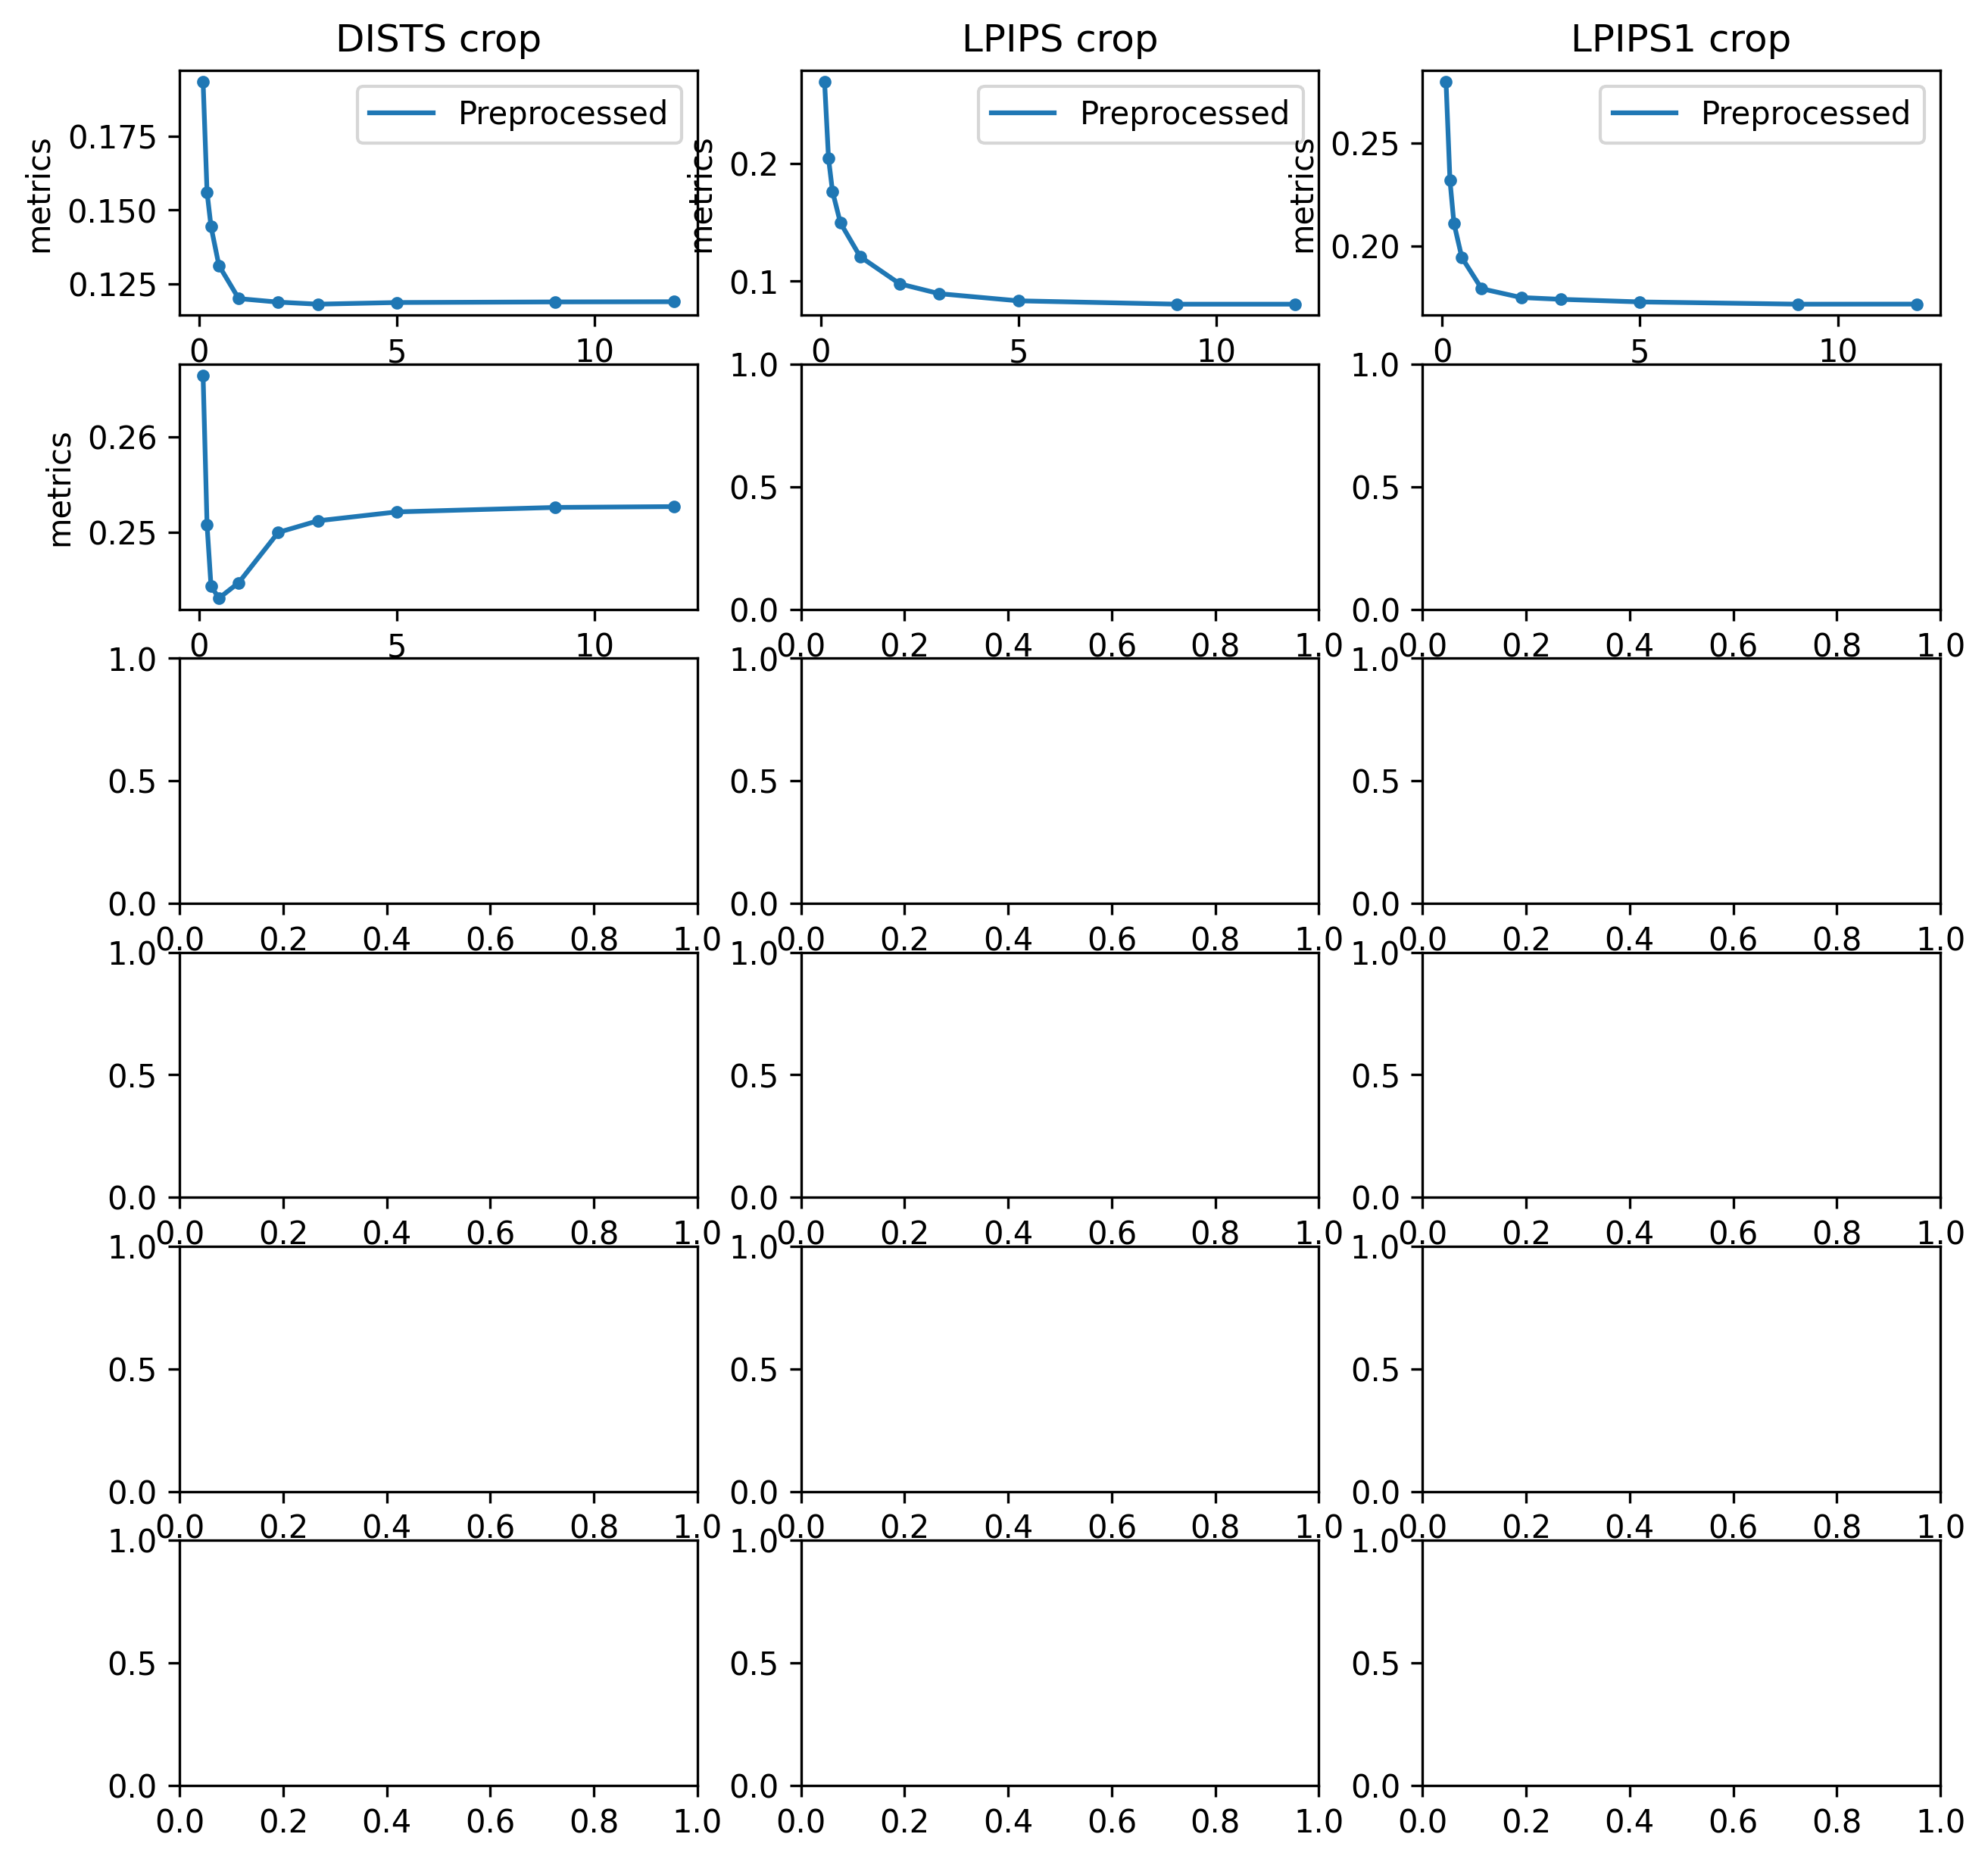

In [14]:
keywords = ["crop", "h264", "motion","neural", "Identity"] 
def map_names(arg, keywords = ["crop", "h264", "motion","neural", "Identity"]):
    return [k in arg for k in keywords] 
m = list(map(map_names, names1))  
rates = [[0.1, 0.2, 0.3, 0.5, 1, 2, 3 ,5,7, 9 ,12 ], [1,3,4,6], [1,2,3,5,7,9],]
import matplotlib.pyplot as plt

met_names = ["DISTS", "LPIPS", "LPIPS1"]
fig, a = plt.subplots(len(logs_1) // 2, 3, dpi = 300, figsize = (10,10))
for idx1, (log, m1, cfg2) in enumerate(zip(logs_1, m, cfg_1)):
    log = log[0]
    keys_cur = [j for i,j in zip(m1, keywords) if i]
    k_str = ""
    for i in keys_cur[:-1]:
        k_str += " " + i
    a = a.ravel()
    for idx, l in enumerate(log): 
        for v_key in ["DISTS", "LPIPS", "LPIPS1"]:
            try:
                y = l.item()[v_key]#list(l.item().keys())[-2]
            except Exception:
                pass
        idx_ful = (idx1 // 2) * 3 + idx 
        codecs = cfg2['general']['codecs']
        if type(codecs[0]) == str:
            
            codecs = [i.split()[-1] for i in codecs] 
            try:
                codecs = [float(i[:-1]) if i[-1] == "M" else float(i[:-1]) / 1000. for i in codecs]
            except Exception:
                pass
        a[idx_ful].plot(codecs, y, label = ("Identity" if m1[-1] else "Preprocessed"))
        a[idx_ful].scatter(codecs, y, marker = '.')
        a[idx_ful].set_xlabel("quality")
        a[idx_ful].set_ylabel("metrics")
        #with open(cfg_dir) as fh:
            #cfg = yaml.load(fh, Loader=yaml.FullLoader)
        
        a[idx_ful].set_title(met_names[idx] + k_str)
        a[idx_ful].legend()
plt.tight_layout()


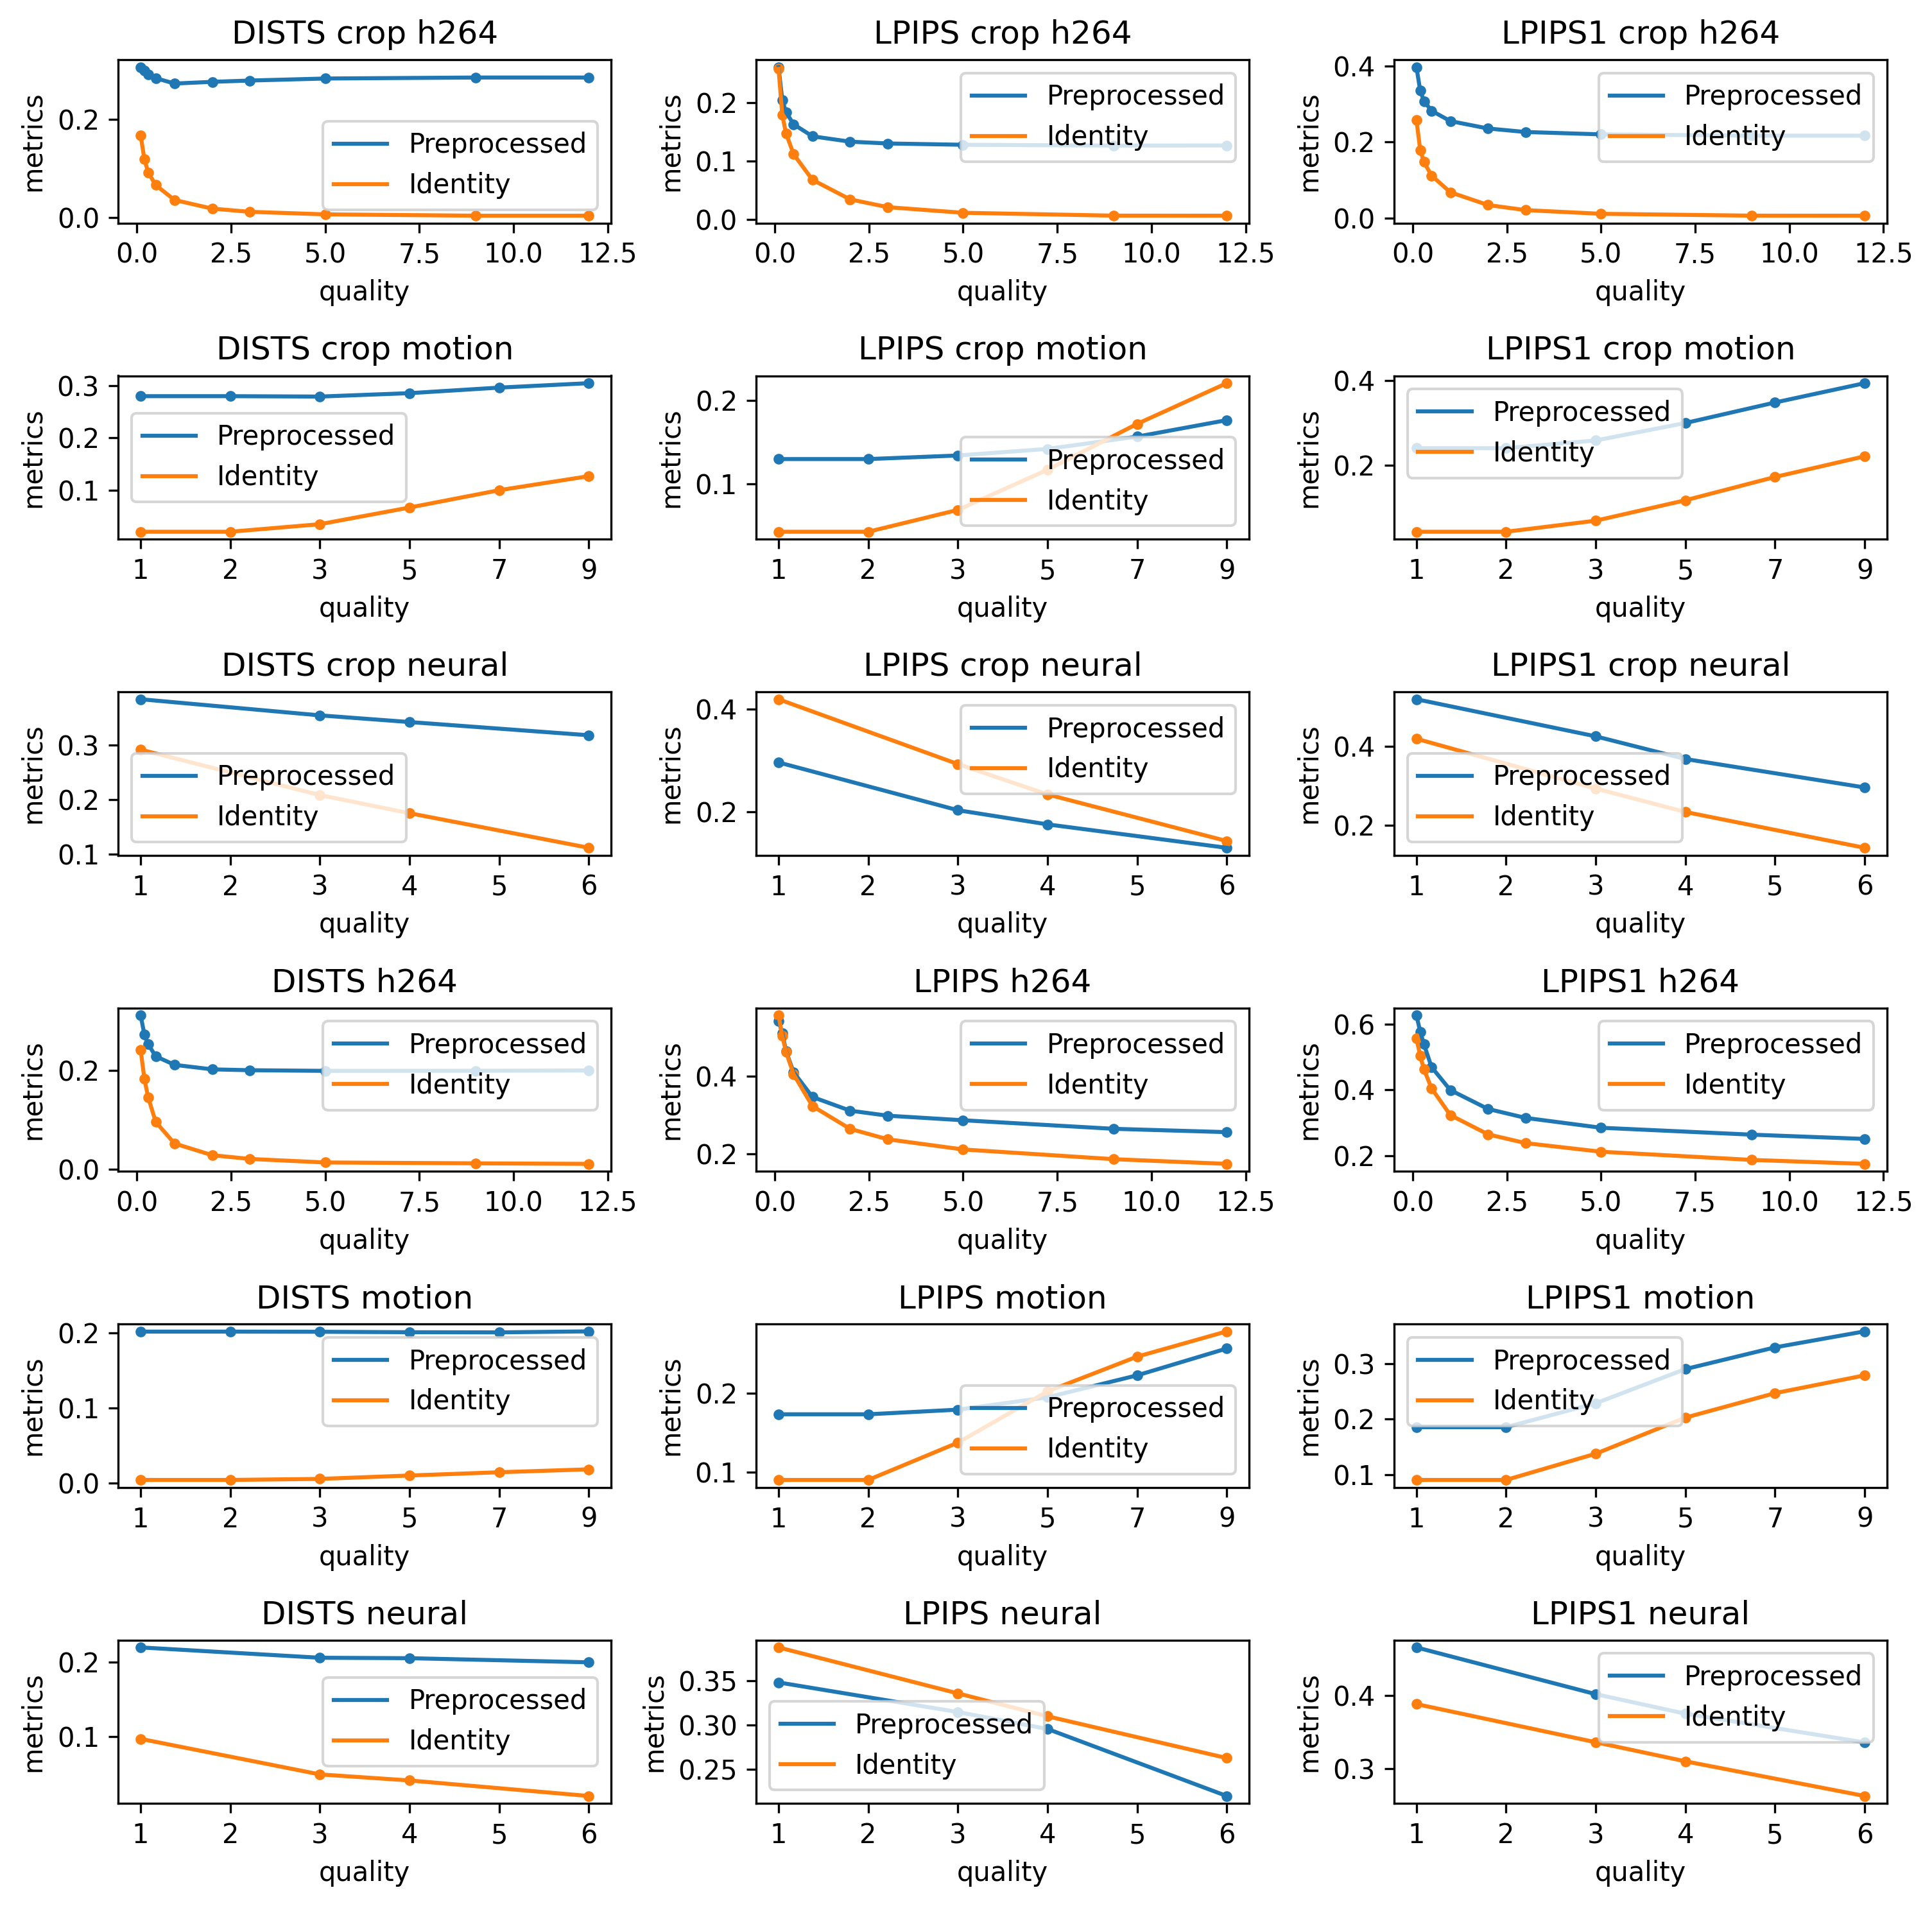

In [57]:
keywords = ["crop", "h264", "motion","neural", "Identity"] 
def map_names(arg, keywords = ["crop", "h264", "motion","neural", "Identity"]):
    return [k in arg for k in keywords] 
m = list(map(map_names, names1))  
rates = [[0.1, 0.2, 0.3, 0.5, 1, 2, 3 ,5,7, 9 ,12 ], [1,3,4,6], [1,2,3,5,7,9],]
import matplotlib.pyplot as plt

met_names = ["DISTS", "LPIPS", "LPIPS1"]
fig, a = plt.subplots(len(logs_1) // 2, 3, dpi = 300, figsize = (10,10))
for idx1, (log, m1, cfg2) in enumerate(zip(logs_1, m, cfg_1)):
    log = log[0]
    keys_cur = [j for i,j in zip(m1, keywords) if i]
    k_str = ""
    for i in keys_cur[:-1]:
        k_str += " " + i
    a = a.ravel()
    for idx, l in enumerate(log): 
        for v_key in ["DISTS", "LPIPS", "LPIPS1"]:
            try:
                y = l.item()[v_key]#list(l.item().keys())[-2]
            except Exception:
                pass
        idx_ful = (idx1 // 2) * 3 + idx 
        codecs = cfg2['general']['codecs']
        if type(codecs[0]) == str:
            
            codecs = [i.split()[-1] for i in codecs] 
            try:
                codecs = [float(i[:-1]) if i[-1] == "M" else float(i[:-1]) / 1000. for i in codecs]
            except Exception:
                pass
        a[idx_ful].plot(codecs, y, label = ("Identity" if m1[-1] else "Preprocessed"))
        a[idx_ful].scatter(codecs, y, marker = '.')
        a[idx_ful].set_xlabel("quality")
        a[idx_ful].set_ylabel("metrics")
        #with open(cfg_dir) as fh:
            #cfg = yaml.load(fh, Loader=yaml.FullLoader)
        
        a[idx_ful].set_title(met_names[idx] + k_str)
        a[idx_ful].legend()
plt.tight_layout()


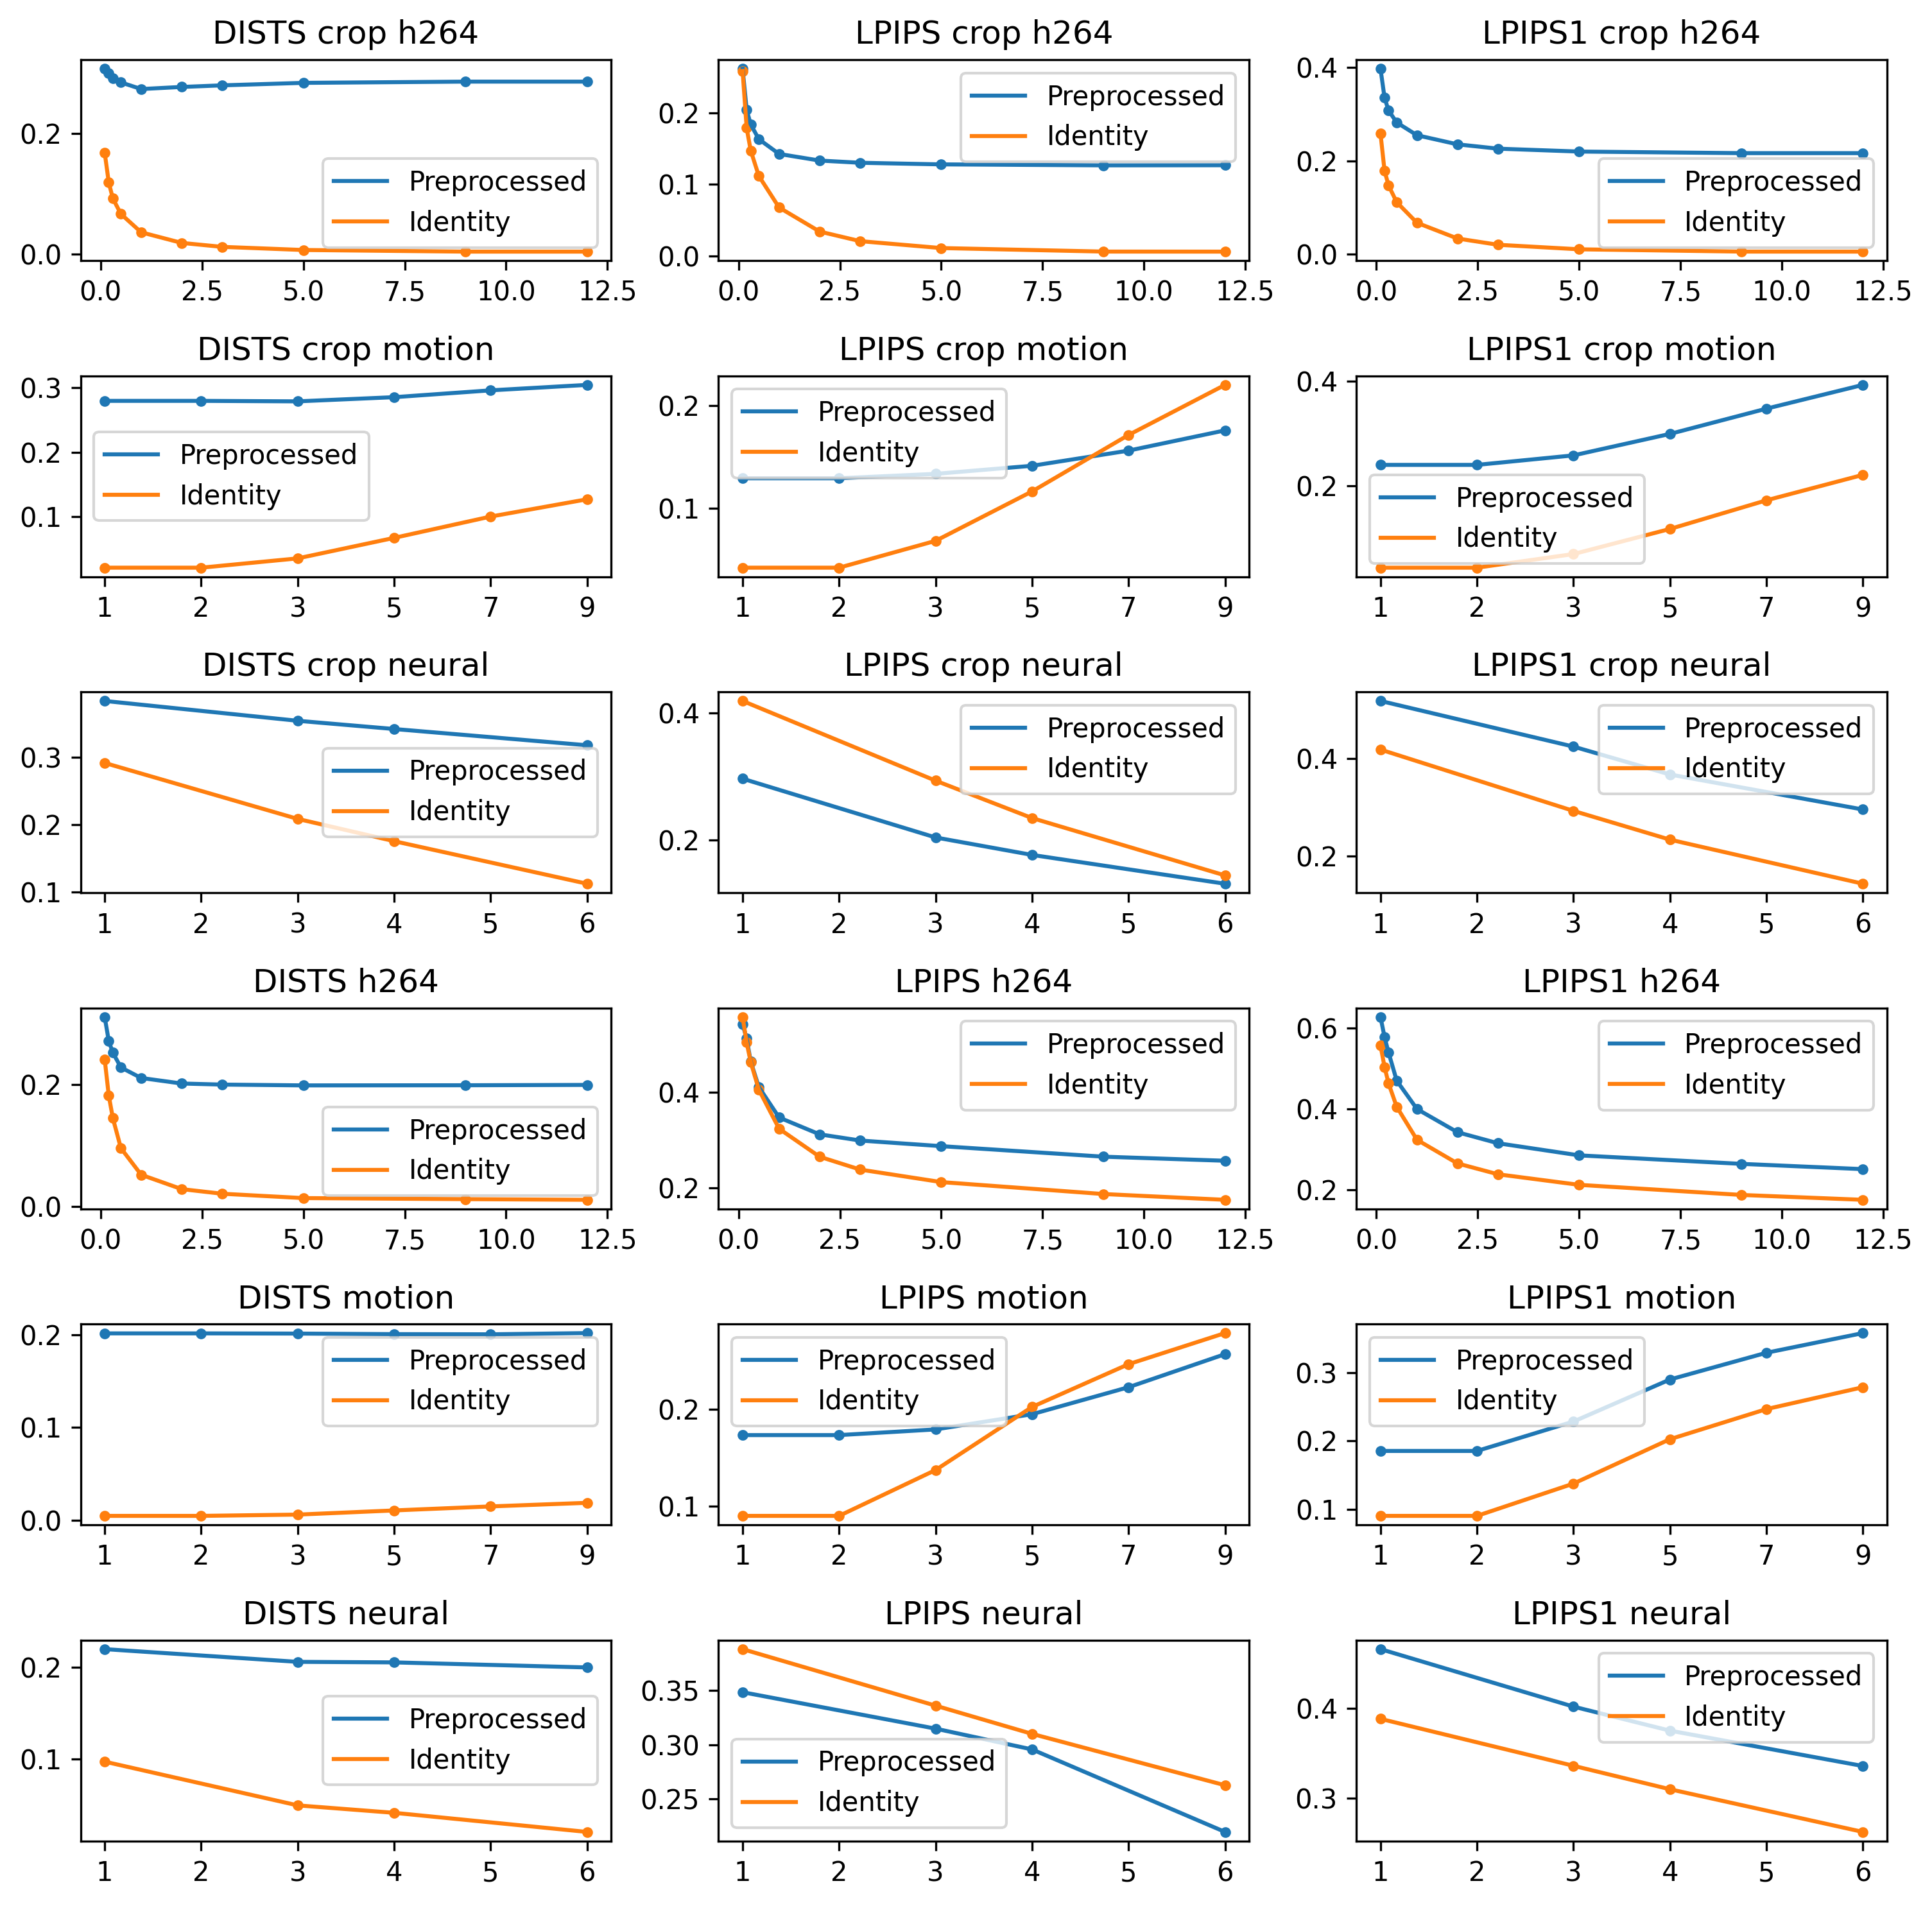

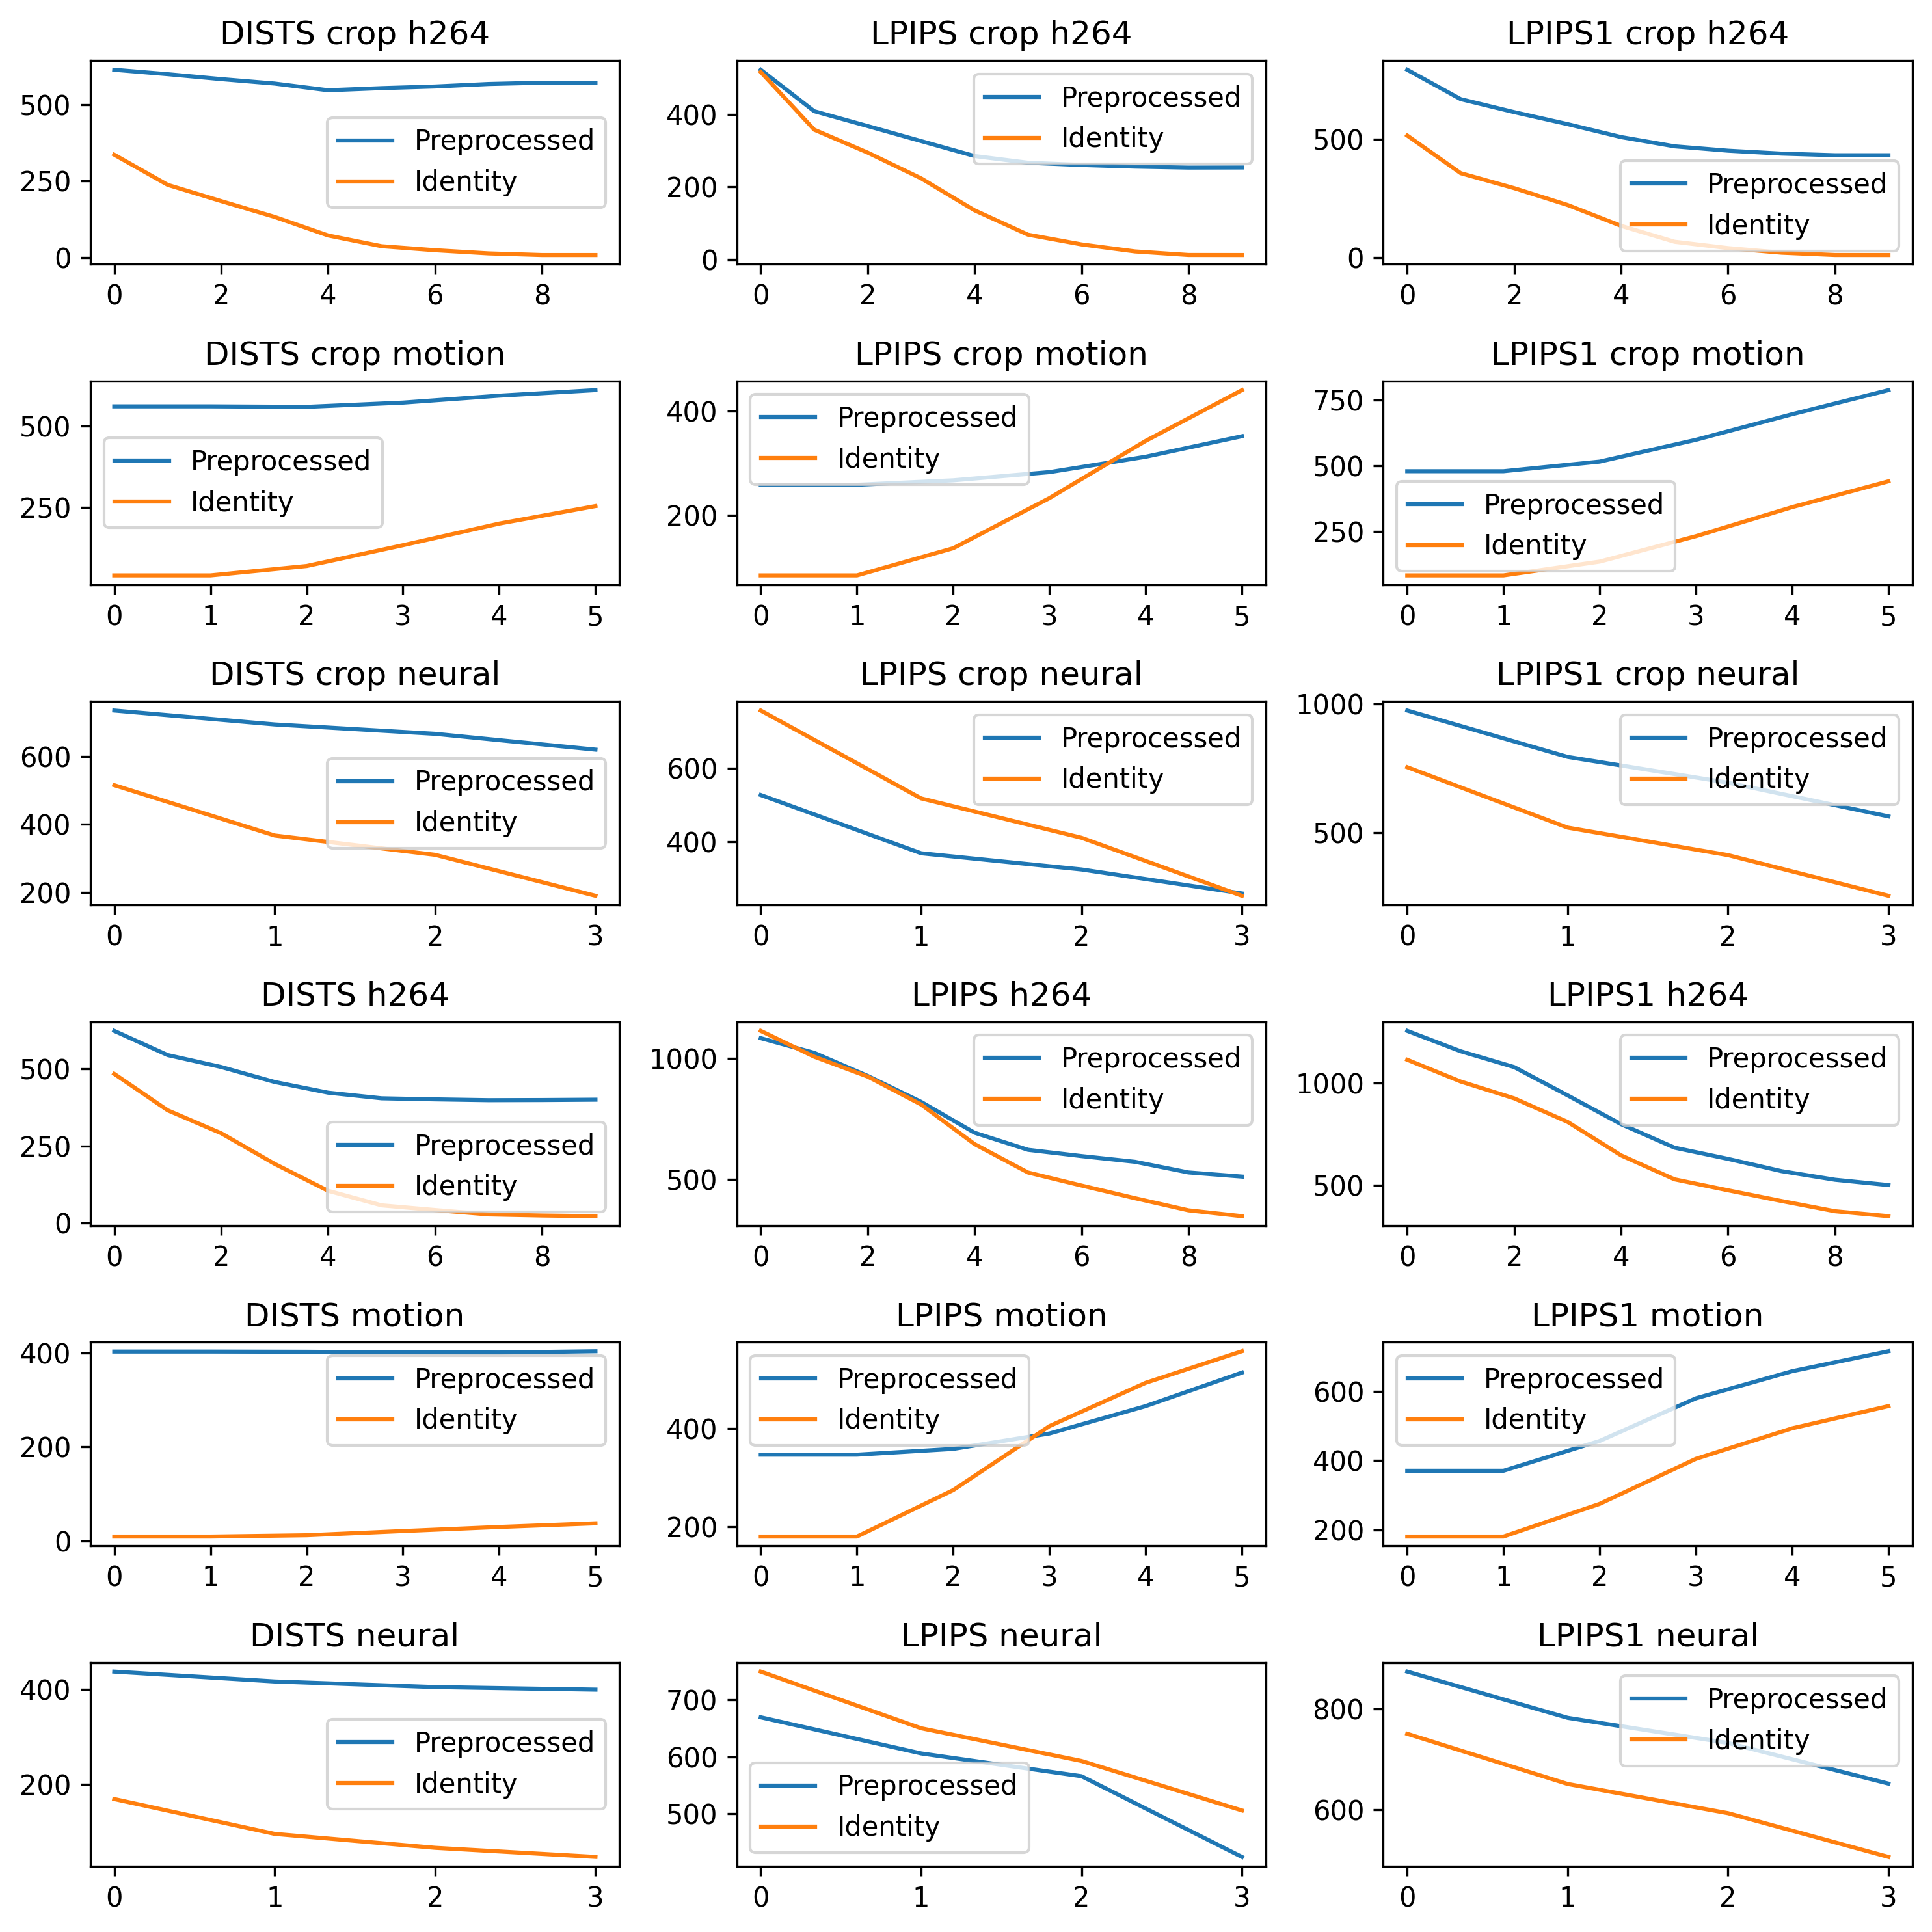

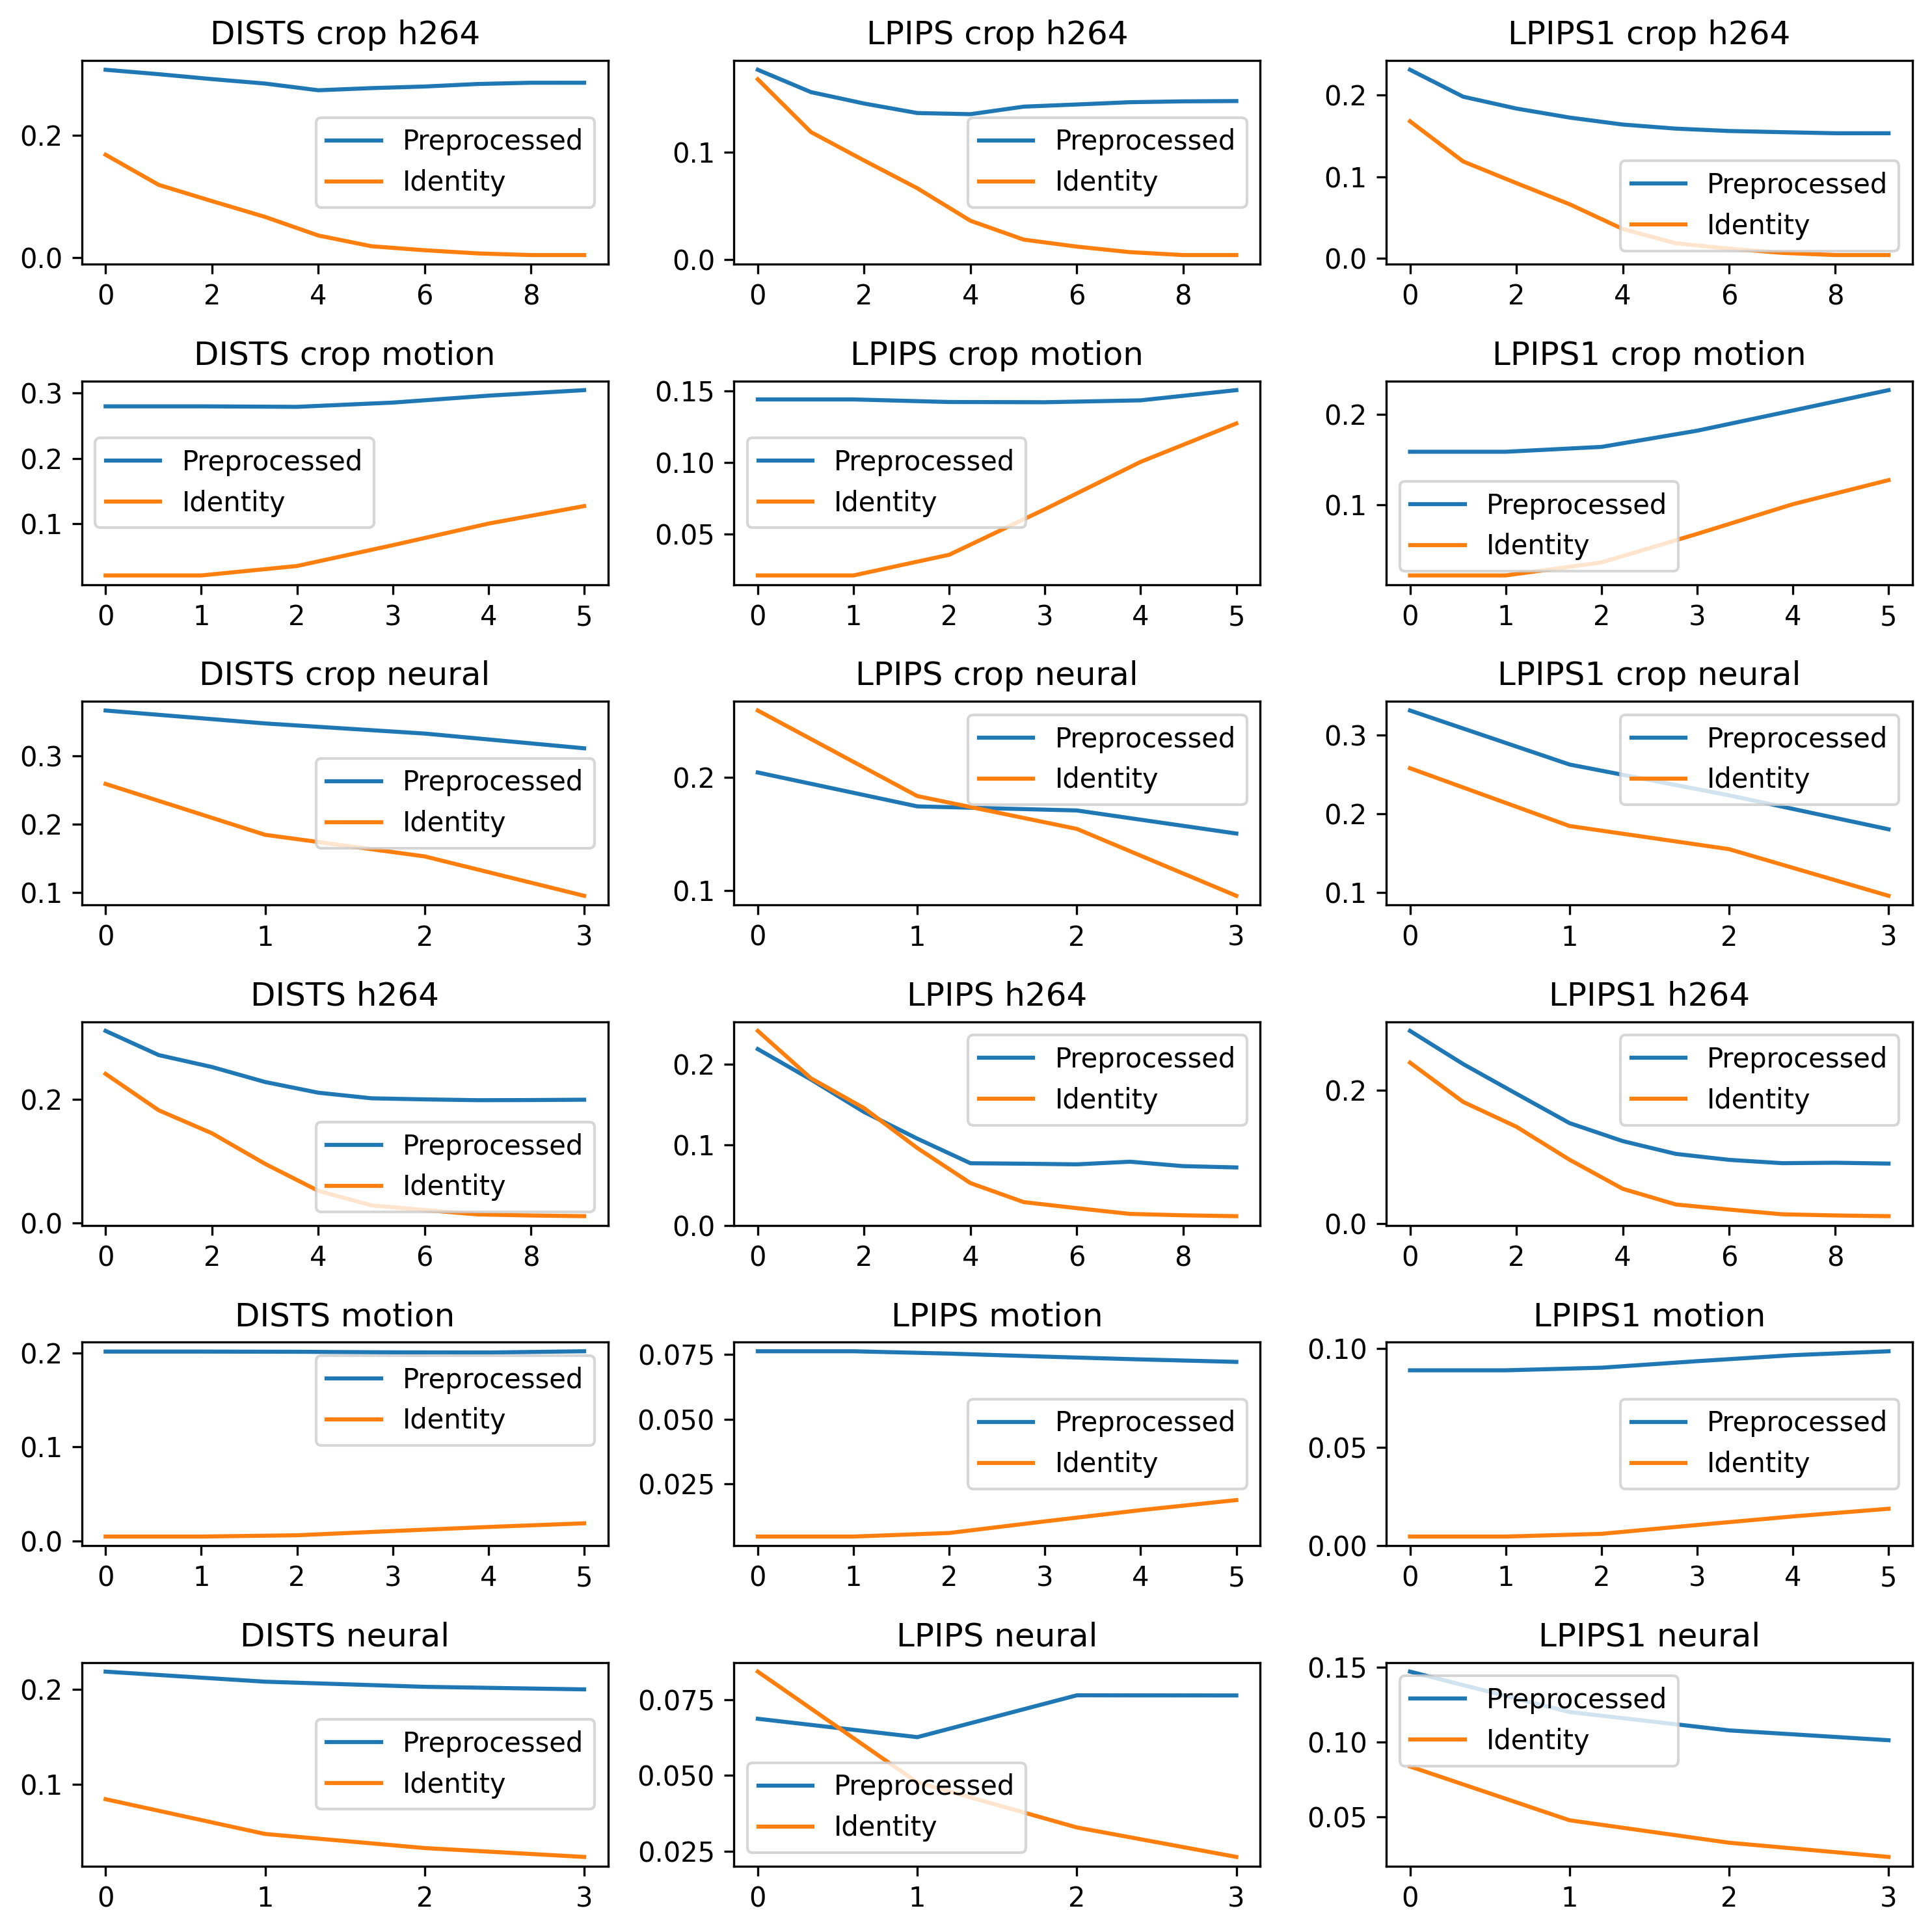